<a href="https://colab.research.google.com/github/bamanan/Exam-Machine-Learnig/blob/main/abdoul_hamid_coulibaly_fst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler, LabelBinarizer, PolynomialFeatures, normalize
from skimage.feature import hog

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import tensorflow as tf


import random

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Chargement des jeux de données

In [302]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
# Loading the main dataset and print it
dataset = pd.read_csv('/content/drive/MyDrive/examen_fst/arabic_dataset.csv', delimiter=";", index_col=0)
dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1697,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1698,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1699,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
# Loading the competition set and print it
competition = pd.read_csv('/content/drive/MyDrive/examen_fst/competition.csv', delimiter=";", index_col=0)

In [305]:
competition
# You should see that there are no labels in this dataset. You'll have to predict them.
# So this dataset can not be used to fit any classifier, just to make predictions with classifiers that you designed

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


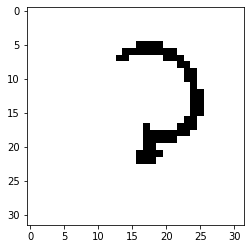

In [306]:
# Here you can see the image 0 of the dataset
idx = 0
plt.imshow(dataset.iloc[idx,1:].to_numpy().reshape(32,32),cmap = 'Greys')
# you can change the value of idx if you want to see another image

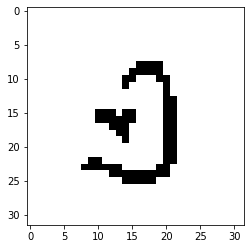

In [307]:
# Same with the image 0 of competition
idx = 0
plt.imshow(competition.iloc[idx,:].to_numpy().reshape(32,32),cmap = 'Greys')

# Part 1 : Analyse préliminaire du jeu de données

## Informations générales

In [308]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 1 to 1700
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 13.3 MB


In [309]:
dataset.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,1700.000000,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,1700.0,...,1700.0,1700.000000,1700.0,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,11.017647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.001176,0.0,0.001765,0.002941,0.001176,0.000588,0.001176,0.002353,0.002353
std,7.550554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.034290,0.0,0.041984,0.054169,0.034290,0.024254,0.034290,0.048464,0.048464
min,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [310]:
dataset.label.value_counts()

12    255
6     250
22    245
18    241
1     238
2     238
16    233
Name: label, dtype: int64

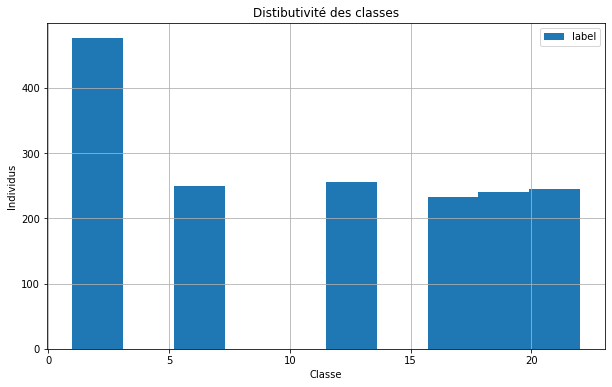

In [311]:
plt.figure(figsize=(10, 6))
dataset.label.hist(legend=True)
plt.xlabel('Classe')
plt.ylabel('Individus')
plt.title('Distibutivité des classes')
plt.show()

Le jeu de données est constitué de 1700 individus sur 1025 colonnes de label, pixel1 jusqu'à pixel1024.
Les features sont les colonnes nommées pixel1...pixel1024 et représentent les niveaux de gris de chaque pixel d'une image en niveaux de gris de la taille 32x32 et la variable cible est la colonne nommée label.
La colonne label désigne la classe des individus. 

Il s'agit ici d'images de caractères de l'alphabet arabes. Le label désignant le numéro d'ordre du caractère dans l'alphabet arabe.

Nous avons 7 caractères différents dans ce jeu de données : 1, 2, 6, 12, 16, 18, 22.

Il s'agit donc d'un problème de classification multiclasse, où l'objectif est de prédire la classe (la lettre) à laquelle appartient chaque exemple en fonction des niveaux de gris de chaque pixel de l'image correspondante.

## Préparation du jeu de données

Divisons le jeu de données en apprentissage, validation et test.

In [312]:
data_train, data_valid_test = train_test_split(dataset, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_valid_test, test_size = 0.5, random_state = 4)

In [313]:
print(f'train set:{data_train.shape} ; test set:{data_test.shape}; validation set:{data_valid.shape}')

train set:(1190, 1025) ; test set:(255, 1025); validation set:(255, 1025)


Le jeu de données a été divisé en 1190 individus pour l'entrainement de nos modèles et en 255 pour chacun des jeu de validation et de test.

# Part 2 : Classifiers based on raw images

## Decision Tree Classifier

L'arbre de décision est un modèle d'apprentissage automatique utilisé pour les problème de classification ou de régression. Il consiste à construire un arbre à partir de données d'entraînement en effectuant des séparations successives sur les variables au fur et à mesure qu'on descend dans l'arbre pour créer des sous-ensembles homogènes en termes de variable cible.
La division se fait en se basant sur une fonction d'impureté comme l'indice de Gini ou l'entropie. L'arbre est construit en choisissant la division qui maximise la réduction de l'impureté ou le gain d'information. 
Les feuilles de l'arbre sont utilisées pour prédire la valeur de la variable cible pour de nouvelles observations.

### Création du modèle

In [314]:
dt = DecisionTreeClassifier(random_state = 42).fit(data_train.iloc[:,1:], data_train.label)

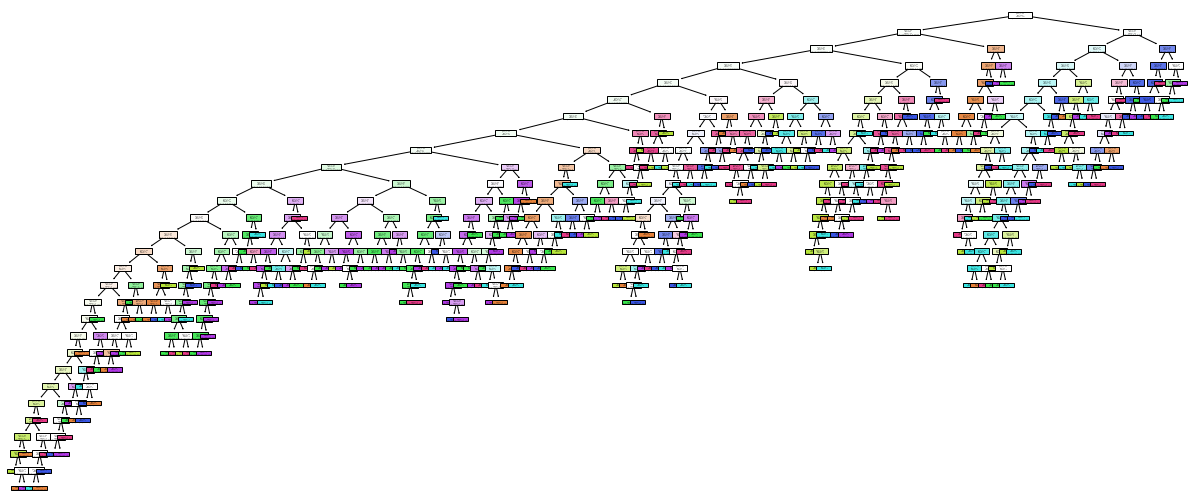

In [315]:
plt.figure(figsize=(21, 9))
plot_tree(dt, filled=True)
plt.show()

In [316]:
print(f'Profondeur de l\'arbre : {dt.tree_.max_depth} ; Nombre de noeuds : {len(dt.tree_.impurity)} ; Nombre de feuilles : {dt.tree_.n_leaves}')
print(f'Impureté à la racine : {round(dt.tree_.impurity[0], 3)*100}% ; Impureté au dernier noeud : {round(dt.tree_.impurity[len(dt.tree_.impurity)-1], 3)*100}%')

Profondeur de l'arbre : 28 ; Nombre de noeuds : 631 ; Nombre de feuilles : 316
Impureté à la racine : 85.7% ; Impureté au dernier noeud : 0.0%


Profondeur de l'arbre : 28 ; Nombre de noeuds : 631 ; Nombre de feuilles : 316
Impureté à la racine : 85.7% ; Impureté au dernier noeud : 0.0%

In [317]:
dt.score(data_train.iloc[:,1:], data_train.label)

1.0

In [318]:
print(dt.score(data_valid.iloc[:,1:], data_valid.label))
print(dt.score(data_test.iloc[:,1:], data_test.label))

0.5372549019607843
0.5098039215686274


Le modèle fait un score (de précision) de 100% sur le jeu d'apprentissage alors qu'il ne fait que 53,72% sur le jeu de validation. Ceci montre que le modèle n'arrive pas à bien généraliser les connaissances apprises. Ceci peut être signe de surajustement (overfitting). C'est-à-dire que le modèle est trop complexe et ne s'adapte pas à de nouvelles données.


Nous allons tracer la courbe de complexité du modèle. C'est-à-dire tracer la performance du modèle sur l'ensemble d'entraînement et l'ensemble de validation en fonction de la complexité du modèle. 
La courbe de validation permet de visualiser l'évolution de la performance du modèle en fonction d'une hyper-paramètre spécifique (par exemple, la profondeur maximale de l'arbre de décision).
Si la performance sur l'ensemble de validation atteint un seuil ou diminue alors que la performance sur l'ensemble d'entraînement continue d'augmenter, cela pourrait indiquer un sur-apprentissage.

Pour cela nous utiliserons la fonction scikit-learn validation_curbe(). Nous allons utiliser la validation

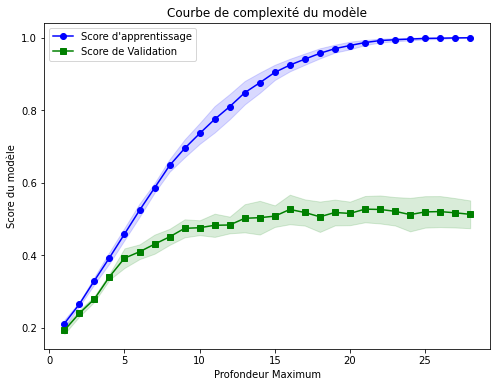

In [319]:
tree = DecisionTreeClassifier(random_state = 42)
param_range = np.arange(1, dt.tree_.max_depth+1)

# Calculer les scores d'apprentissage et de validation pour chaque valeur de profondeur maximale
train_scores, valid_scores = validation_curve(
    tree, data_train.iloc[:,1:], data_train.label, param_name='max_depth', param_range=param_range, cv=5
)

# Calculer les moyennes et écarts-types des scores d'apprentissage et de validation pour chaque valeur de profondeur maximale
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Tracer la courbe de complexité
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, label='Score d\'apprentissage', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, label='Score de Validation', color='green', marker='s')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')
plt.title('Courbe de complexité du modèle')
plt.xlabel('Profondeur Maximum')
plt.ylabel('Score du modèle')
plt.legend(loc='best')
plt.show()

Plus on descend en profondeur dans l'arbre, plus l'arbre sépare correctement les données d'apprentissage. Quant aux données de validation, le modèle a du mal à prédire correctement les classes des individus. La courbe stagne autour du score de 53%.
De plus, avec 28 niveaux et 631 noeuds, le modèle est trop complexe (sur-apprentissage).

### Amélioration du modèle

Nous allons élaguer l'arbre en supprimant les noeuds qui ne permettent pas d'apporter une précision significative au modèle.

In [320]:
tree = DecisionTreeClassifier(random_state = 42)
path = tree.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Le paramètre ccp_alpha correspond à la pénalité appliquée pour reduire le nombre de noeuds.

In [321]:
# Initialisation des scores
train_scores, valid_scores = [], []

# Entrainer et évaluer le modèle pour différentes valeurs de l'hyper-paramètre alpha (=complexité)
for alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(ccp_alpha=alpha, random_state = 42)
    dtc.fit(data_train.iloc[:,1:], data_train.label)
    train_scores.append(dtc.score(data_train.iloc[:,1:], data_train.label))
    valid_scores.append(dtc.score(data_valid.iloc[:,1:], data_valid.label))

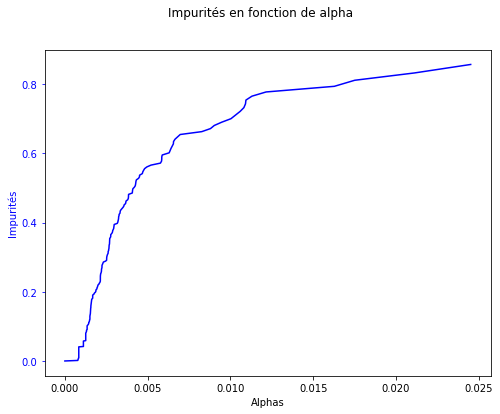

In [322]:
# Tracé des impurités en fonction de ccp_alphas
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, impurities, 'b-')
plt.ylabel('Impurités', color='b')
plt.xlabel('Alphas')
plt.tick_params('y', colors='b')
plt.suptitle('Impurités en fonction de alpha')

plt.show()

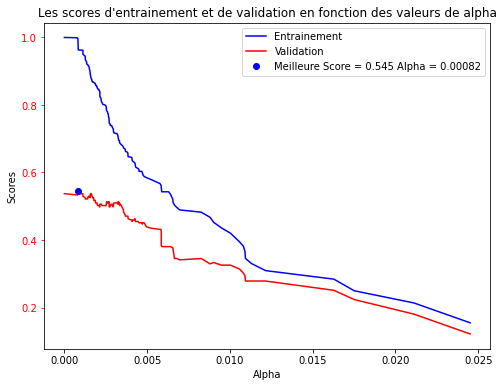

In [323]:
# Les scores d'entrainement et de validation en fonction des valeurs de alpha
max_score_index = np.argmax(valid_scores)
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, 'b-', label='Entrainement')
plt.plot(ccp_alphas, valid_scores, 'r-', label='Validation')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.tick_params('y', colors='r')

# Plot best validation score
plt.plot(ccp_alphas[max_score_index], valid_scores[max_score_index], 'bo', label=f'Meilleure Score = {round(max(valid_scores), 3)} Alpha = {round(ccp_alphas[max_score_index], 5)}')

# Add legends and title
plt.legend(loc='best')
plt.title('Les scores d\'entrainement et de validation en fonction des valeurs de alpha')

# Show the plot
plt.show()

Une grande valeur de alpha a pour conséquence de réduire le nombre de noeuds et donc, d'ajouter l'impureté dans l'arbre de décision sur le jeu d'entrainement.
Par contre, une valeur trop faible ne permet pas d'optimiser l'arbre.
La valeur de alpha qui donne le meilleur score sur le jeu de validation (54,5%) est 0.00082.

In [324]:
dt_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alphas[max_score_index], random_state = 42)
dt_pruned.fit(data_train.iloc[:,1:], data_train.label)
print(f'Profondeur de l\'arbre : {dt_pruned.tree_.max_depth} ; Nombre de noeuds : {len(dt_pruned.tree_.impurity)} ; Nombre de feuilles : {dt_pruned.tree_.n_leaves}')
print(f'Impureté à la racine : {round(dt_pruned.tree_.impurity[0], 3)*100}% ; Impureté au dernier noeud : {round(dt_pruned.tree_.impurity[len(dt_pruned.tree_.impurity)-1], 3)*100}%')

Profondeur de l'arbre : 28 ; Nombre de noeuds : 611 ; Nombre de feuilles : 306
Impureté à la racine : 85.7% ; Impureté au dernier noeud : 0.0%


Le nombre de noeuds dans l'arbre a été reduit.

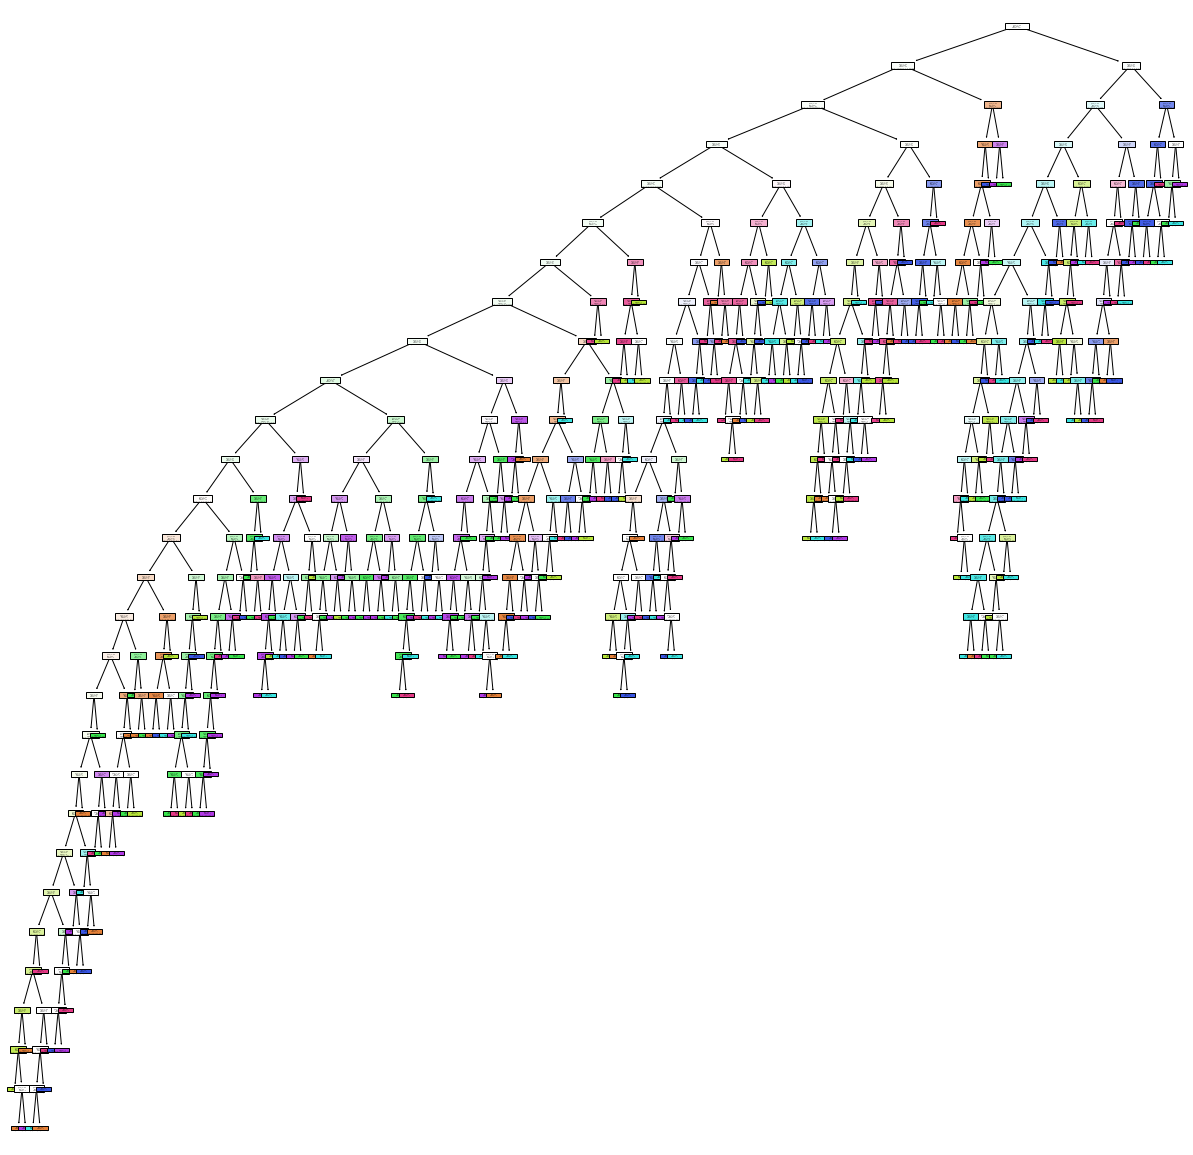

In [325]:
plt.figure(figsize=(21, 21))
plot_tree(dt_pruned, filled=True)
plt.show()

In [326]:
print(dt_pruned.score(data_train.iloc[:,1:], data_train.label))
print(dt_pruned.score(data_valid.iloc[:,1:], data_valid.label))

0.9957983193277311
0.5450980392156862


L'élégage de l'arbre a eu pour effet d'ajouter de l'impureté dans les feuilles du jeu d'entrainement.
Il y amélioration sur le score de validation = 54,50% sur le jeu de validation. C'est le plus haut score qu'on puisse obtenir avec l'arbre de décision.
Quel est le score pour de nouvelles données ? Appliquons notre modèle sur le jeu de test.

In [327]:
print(dt_pruned.score(data_test.iloc[:,1:], data_test.label))

0.5137254901960784


Le modèle amélioré fait une bonne prédiction 51,37% sur le jeu de tests.

### Soumission des résultats sur Kaggle

In [328]:
# Prédiction du modèle dt_pruned sur la dataset competition
pred = dt_pruned.predict(competition.iloc[:,:])
pred

array([22,  1, 12, 16, 16, 18,  6, 16, 18, 12,  2,  6,  6, 22, 18,  1,  1,
        6, 18, 12, 22,  1, 18, 12,  2,  1, 16,  6, 22,  2, 18,  2,  6,  1,
        1,  2,  1,  1,  1, 18, 22, 22,  6, 18,  2, 16,  6, 22, 18, 18,  6,
        1, 16, 22, 18,  1, 22,  6, 12, 18,  2, 16, 22, 12, 18,  6,  2, 22,
       12, 12, 18,  6, 22,  6, 18,  6,  2,  6,  1,  1, 16, 22, 22,  6, 22,
       18,  1, 12, 22,  2,  2, 18, 22,  6, 22,  2,  1, 16,  2, 12, 16, 12,
       16,  6, 16, 18, 22, 22, 18,  2, 22, 22,  2, 22, 12,  2, 16, 12,  1,
       22,  1,  1, 22, 16, 12, 12,  1, 16,  6,  2,  6, 16, 18, 22,  6, 18,
       18,  2,  1, 16,  6, 12, 16,  6,  2,  6,  6, 22, 12, 18, 18,  6,  1,
        6, 16, 18,  6, 16,  2, 12,  1, 16,  1,  6, 16, 22,  6, 12,  1, 18,
        6,  2,  2, 16, 16, 16, 22,  6,  2,  6,  6, 22,  1, 18, 12,  2, 22,
        1, 18, 16, 18,  1,  1, 16,  6,  6, 18,  1,  2,  2,  1, 18, 12,  6,
        2,  6,  1,  1, 12, 16,  2, 18,  1, 18, 12, 18, 18,  1, 12,  2,  1,
        1,  6, 12, 22,  2

In [329]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,22
1,2,1
2,3,12
3,4,16
4,5,16
...,...,...
495,496,2
496,497,16
497,498,18
498,499,22


In [330]:
df.to_csv('decision_tree_on_competition.csv', index=False)

## SVM

Les SVM (Support Vector Machine) ou "classifieus à vaste marge" sont une méthode d'apprentissage supervisé utilisée pour la classification et la régression.
Ils peuvent être utilisés pour résoudre des problèmes de classification binaires et multiclasse.
Le principe des SVM est de trouver l'hyperplan qui maximise la marge entre les données et les sépare en deux classes distinctes.


Si les données ne peuvent pas être séparées linéairement, les SVM utilisent une technique appelée noyau (kernel) pour projeter les données dans un espace de dimension supérieure où une séparation linéaire est possible.
Les noyaux les plus couramment utilisés sont : le noyau linéaire, le noyau polynômial et le noyau gaussien (RBF).

- Le noyau linéaire est utilisé lorsque les données sont linéairement séparables.
- Le noyau polynômial est utilisé lorsque les données ne sont pas linéairement séparables et peuvent être transformées en une dimension supérieure.
- Le noyau gaussien (RBF) est utilisé lorsque les données ne sont pas linéairement séparables et nécessitent une transformation non linéaire.

D'autres paramètres sont également importants :
- Le paramètre C contrôle le trade-off entre la maximisation de la marge et la minimisation de l'erreur de classification. Une valeur de C élevée donne une marge plus étroite, ce qui peut entraîner du surajustement, tandis qu'une valeur de C faible donne une marge plus large, ce qui peut entraîner une mauvaise généralisation.
- Le paramètre gamma est utilisé pour régler la courbure du noyau gaussien et contrôler la complexité du modèle.

### Mise à l'écchelle des variables

Sur ce type de classifieur, il peut être utile de mettre à l'échelle les données. C'est une transformation qui va centrer et reduire les données. Cela évite que les variables aient des variances trop fortes par rapport à d'autres. Dans le cas contraire, cela peut conduire à des problèmes de convergence du modèle, à une sensibilité accrue aux valeurs aberrantes et à une performance globale inférieure du modèle.

In [331]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(data_train.iloc[:,1:])
X_valid_scaled = scaler.fit_transform(data_valid.iloc[:,1:])
X_test_scaled = scaler.fit_transform(data_test.iloc[:,1:])


X_train_scaled = pd.DataFrame(X_train_scaled, columns=data_train.columns[1:])
X_valid_scaled = pd.DataFrame(X_valid_scaled, columns=data_valid.columns[1:])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=data_test.columns[1:])

X_train_scaled


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
1187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
1188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103


### SVM Linéaire

#### Création du modèle

In [332]:
model_svm = SVC(C = 1000, kernel = 'linear', random_state=42).fit(X_train_scaled, data_train.label)

In [333]:
# Support vectors
pd.DataFrame(model_svm.support_vectors_)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103
919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.029001,...,0.0,-0.04103,0.0,-0.04103,-0.050273,-0.04103,0.0,0.0,0.0,-0.04103


Cette matrice est de la forme (n_support, n_features) où n_support est le nombre de vecteurs de support et n_features est le nombre de caractéristiques dans les données d'entrée. Chaque ligne de la matrice correspond à un vecteur de support.
Les vecteurs de support sont les échantillons les plus proches de la frontière de décision, qui ont une influence sur la position de la frontière.

In [334]:
pd.DataFrame(model_svm.support_)
# Renvoie la position de chaque vecteur de support dans le jeu de données

,0
0,26
1,38
2,39
3,80
4,88
...,...
916,1151
917,1153
918,1175
919,1185


In [335]:
pd.DataFrame(model_svm.dual_coef_)
# the lagrange coefficients associated to the support vectors

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
0,0.000144,0.000000,0.000000,0.003194,0.008173,0.000000,0.003756,0.000021,0.000000,0.000581,...,-0.000000,-0.000006,-0.000000,-0.000675,-0.0000,-0.00000,-0.000000,-0.00000,-0.000000,-0.000000
1,0.000000,0.000000,0.014063,0.000221,0.005727,0.000000,0.015409,0.000444,0.000000,0.000112,...,-0.000000,-0.000711,-0.000000,-0.010049,-0.0000,-0.00315,-0.000000,-0.00008,-0.000973,-0.000000
2,0.000000,0.000153,0.003976,0.002868,0.005930,0.000000,0.004925,0.000034,0.000000,0.000000,...,-0.001727,-0.000000,-0.004585,-0.000000,-0.0000,-0.00000,-0.000000,-0.00000,-0.000000,-0.000471
3,0.000000,0.000000,0.010213,0.001405,0.005027,0.000000,0.006530,0.000150,0.000000,0.000296,...,-0.000000,-0.000000,-0.000000,-0.018832,-0.0008,-0.00000,-0.004089,-0.00000,-0.002520,-0.000000
4,0.000000,0.000188,0.005938,0.000000,0.005940,0.006156,0.006204,0.000480,0.002053,0.000000,...,-0.002647,-0.001561,-0.000000,-0.015428,-0.0000,-0.00000,-0.000000,-0.00000,-0.000000,-0.000000
5,0.000000,0.000978,0.004439,0.001446,0.004136,0.000243,0.006167,0.000129,0.000000,0.000000,...,-0.000914,-0.000000,-0.000000,-0.000000,-0.0000,-0.00000,-0.002233,-0.00000,-0.000000,-0.000000


In [336]:
pd.DataFrame(model_svm.intercept_)
# the constants of the model

,0
0,-0.236175
1,-0.927271
2,-0.384914
3,-0.522222
4,-0.750093
5,-0.621677
6,-0.400309
7,-0.481849
8,-0.593474
9,-0.342533


In [337]:
model_svm.score(X_train_scaled, data_train.label)

1.0

In [338]:
# Sur le jeu de validation
model_svm.score(X_valid_scaled, data_valid.label)

0.7215686274509804

On obtient une précision de 72,15% sur le jeu de validation. Est-ce que ce modèle peut-être amélioré ?

#### Ajustement du modèle

Le modèle peut être amélioré en jouant sur le paramètre C

In [339]:
c_values = np.logspace(-3, 3, num=10)
train_scores, valid_scores = [], []
for c in c_values:
    model_svm = SVC(C = c, kernel = 'linear', random_state=42).fit(X_train_scaled, data_train.label)
    train_scores.append(model_svm.score(X_train_scaled, data_train.label))
    valid_scores.append(model_svm.score(X_valid_scaled, data_valid.label))
    
max_score_index = np.argmax(valid_scores)
print(f'Meilleur valeur de C: {c_values[max_score_index]}, Score associé: {round(max(valid_scores),3)}')

Meilleur valeur de C: 0.004641588833612777, Score associé: 0.757


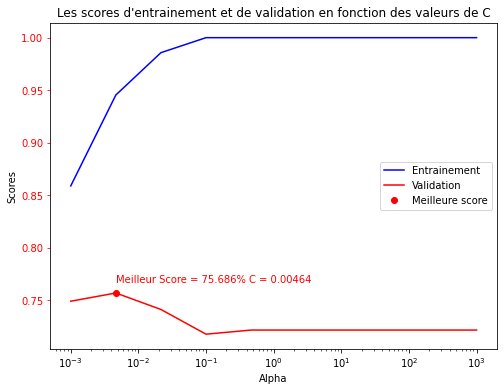

In [340]:
# Les scores d'entrainement et de validation en fonction des valeurs de C
max_score_index = np.argmax(valid_scores)
plt.figure(figsize=(8, 6))
plt.plot(c_values, train_scores, 'b-', label='Entrainement')
plt.plot(c_values, valid_scores, 'r-', label='Validation')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.tick_params('y', colors='r')
plt.xscale('log')

# Meilleur score de validation
plt.plot(c_values[max_score_index], valid_scores[max_score_index], 'ro', label='Meilleure score')
plt.annotate(f'Meilleur Score = {round(max(valid_scores)*100, 3)}% C = {round(c_values[max_score_index], 5)}',
             xy=(c_values[max_score_index], valid_scores[max_score_index]+0.01), color='red')

# Legende et titre
plt.legend(loc='best')
plt.title('Les scores d\'entrainement et de validation en fonction des valeurs de C')

# Show the plot
plt.show()

Le meilleur score est obtenu avec le paramètre c=0.1 et est de 75,68%. Au-delà de C=0.01, on tombe dans du sur-apprentissage et le modèle baisse en efficacité sur de nouvelles données.

In [341]:
model_svm = SVC(C = c_values[max_score_index], kernel = 'linear', random_state=42).fit(X_train_scaled, data_train.label)
model_svm.score(X_test_scaled, data_test.label)

0.7607843137254902

On obtient un score de 76,07% sur le jeu de test. Ce score est au-dessus du score de validation. Notre modèle généralise bien.

#### Soumission des résultats sur Kaggle

In [342]:
# Prédiction du modèle sur la dataset competition mise à échelle
competition_scaled = scaler.transform(competition)
competition_scaled = pd.DataFrame(competition_scaled, columns=competition.columns)

pred = model_svm.predict(competition_scaled)
pred

array([22, 16, 16, 16, 16,  6, 18, 22, 18, 18,  2,  6, 22, 22,  6,  1,  6,
       18, 18, 12,  2,  1, 16, 12, 12,  1, 16, 18,  1,  2,  6,  2, 18,  1,
       18,  2,  1,  2,  1,  6, 16, 22,  2,  6,  2,  6,  6, 16,  6, 18, 16,
        1, 12, 12, 18, 12, 18,  6, 12, 18,  6, 16,  6, 18, 18, 18,  2, 22,
       16, 16, 18,  6, 18,  6,  1, 18,  2, 22, 18,  1, 22, 12,  1, 18, 22,
       18,  1,  2, 22,  2, 22, 22, 22, 22,  2, 22,  1, 12, 22, 12, 12, 12,
       16,  6, 22,  6,  6,  2, 18,  2, 12,  2,  2,  1, 16,  2,  1, 16, 18,
       18,  1,  6, 22, 16, 12, 16,  1,  2, 22,  2,  6, 22, 18, 12,  2,  2,
       18,  2,  1, 12, 22, 18, 12, 22, 22, 18,  6, 22, 12, 18, 18,  6,  1,
        6, 16,  6,  6, 16, 12, 12,  1,  6, 22, 18, 16, 22,  6, 18,  1,  1,
        6,  2,  2, 16, 16, 16, 22,  6,  2,  1,  1,  2,  1, 18, 12, 12, 12,
        2, 18, 16, 18,  1,  1,  6,  6,  6, 12,  1, 22,  2,  1, 18, 22,  2,
        2, 22,  1,  1, 12, 12, 16,  6,  1,  6,  6,  6, 18, 18, 12,  2,  1,
        1, 18, 22,  6,  2

In [343]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,22
1,2,16
2,3,16
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,18
498,499,22


In [344]:
df.to_csv('svm_linear_on_competition.csv', index=False)

On est parvenu à augmenter la précision de notre modèle linéaire en changeant le paramètre C. 
Essayons de mettre de la non-linéarité dans notre modèle grâce au paramètre gamma et observons les performances du modèle.

### SVM Polynomiale

On maintient le paramètre C=0.01 obtenu sur le modèle linéaire.

#### Création du modèle

In [345]:
model_svm_poly = SVC(C = c_values[max_score_index], kernel = 'poly', random_state=42).fit(X_train_scaled, data_train.label)
print('Training score :', model_svm_poly.score(X_train_scaled, data_train.label))
print('Validation score :',model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label))
print('Test score :',model_svm_poly.score(X_test_scaled, data_test.label))

Training score : 0.1722689075630252
Validation score : 0.12156862745098039
Test score : 0.13725490196078433


On obtient des scores très bas par rapport au SVM linéaire. Changeons les valeurs de gamma et de C.

#### Amélioration du modèle

In [346]:
gammas = np.logspace(-3, 3, num=10)
train_scores, valid_scores = [], []
best_score = 0.0
best_gamma = 0.0
best_c = 0.001
for g in gammas:
    for c in c_values:
        model_svm_poly = SVC(C = c, kernel = 'poly', gamma=g, random_state=42).fit(X_train_scaled, data_train.label)
        score = model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label)
        if score>best_score:
            best_score=score
            best_gamma = g
            best_c = c
        
print(f'Meilleur gamma: {best_gamma}, Meilleur c: {best_c} , Score associé: {best_score}')

Meilleur gamma: 0.001, Meilleur c: 0.46415888336127775 , Score associé: 0.17647058823529413


In [347]:
model_svm_poly = SVC(kernel = 'poly', C = best_c, gamma=best_gamma).fit(X_train_scaled, data_train.label)
model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label)

0.17647058823529413

On a un score de 78,03% sur le jeu de validation, ce qui est meilleur qu'en svm linéaire

In [348]:
model_svm_poly.score(X_test_scaled, data_test.label)

0.16470588235294117

Le modèle a une précision 80,78% sur le jeu de test. Ceci montre une très bonne capacité de généralisation.

#### Soumission sur Kaggle

In [349]:
# Prédiction du modèle dt_pruned sur la dataset competition
pred = model_svm.predict(competition_scaled)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('svm_poly_on_competition_scaled.csv', index=False)

### SVM RBF

On gardera les mêmes valeurs d'hyper paramètres pour tester le modèle avec le noyeau RBF.

#### Création du modèle

In [350]:
model_svm_rbf = SVC(kernel = 'rbf', C = best_c, gamma=best_gamma, random_state=42).fit(X_train_scaled, data_train.label)
print('Training score :', model_svm_rbf.score(X_train_scaled, data_train.label))
print('Validation score :', model_svm_rbf.score(data_valid.iloc[:,1:], data_valid.label))

Training score : 0.8109243697478992
Validation score : 0.27450980392156865


On obtient un score de validation bas par rapport au SVM polynomial. On peut faire varier les hyper-paramètres comme précedemment.

#### Amélioration du modèle du modèle.

In [351]:
best_score = 0.0
best_gamma = 0.0
best_c = 0.001
gammas = np.logspace(-3, 3, num=7)
c_values = np.logspace(-3,3,num=7)
for g in gammas:
    for c in c_values:
        model_svm_poly = SVC(kernel = 'rbf', C = c, gamma=g, random_state=42).fit(X_train_scaled, data_train.label)
        score = model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label)
        if score>best_score:
            best_score=score
            best_gamma = g
            best_c = c
        
print(f'Meilleur gamma: {best_gamma}, Meilleur c: {best_c} , Score associé: {best_score}')

Meilleur gamma: 0.01, Meilleur c: 10.0 , Score associé: 0.43137254901960786


On atteint une précision 75,68% à partir de c=100 et gamma=0.001. Au-délà, le score n'augmente plus.

In [352]:
model_svm_rbf = SVC(kernel='rbf', gamma=best_gamma, C=best_c, random_state=42).fit(X_train_scaled, data_train.label)
model_svm_rbf.score(X_test_scaled, data_test.label)

0.5529411764705883

On a un score de 74,11% sur le jeu de test, plus faible que les modèles précedents.

#### Soumission sur Kaggle

In [353]:
# Prédiction du modèle dt_pruned sur la dataset competition
pred = model_svm_rbf.predict(competition_scaled)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('svm_rbf_on_competition_scaled.csv', index=False)

## K-nearest-neighbour

L'algorithme k-plus-proches-voisins est une méthode supervisée pour classifier les données en fonction de leurs similarités avec d'autres individus. Chaque individu est classé ensemble avec les k-voisins qui partagent majoritairement les mêmes traits que lui.

### Création du modèle

In [354]:
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(X_train_scaled, data_train.label)

KNeighborsClassifier(n_neighbors=1)

In [355]:
model_1nn.score(data_valid.iloc[:,1:], data_valid.label)

0.42745098039215684

On obtient une précision de 73,72% sur le jeu de validation. On va essayer d'améliorer ce score en augmentant le nombre de voisins K.

### Amélioration du modèle

In [356]:
# On prend un nombre de voisins entre 1 100 par pas de 2 voisins.
k_neighbors = []
scores = []
for k in range(1, 100, 2):
    k_neighbors.append(k)
    model = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, data_train.label)
    score = model.score(data_valid.iloc[:,1:], data_valid.label)
    scores.append(score)

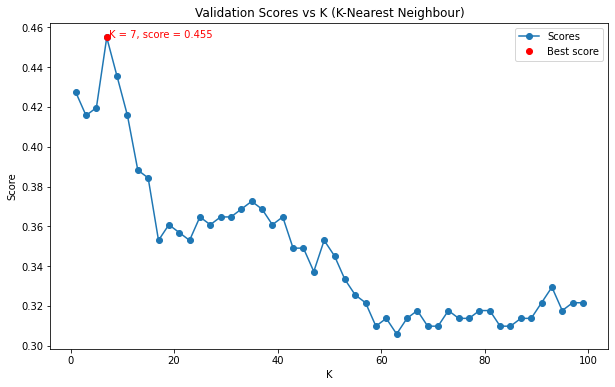

In [357]:
# Plotting the scores per K value
max_score_index = np.argmax(scores)

plt.figure(figsize=(10, 6))
plt.plot(k_neighbors, scores, '-o', label='Scores')
plt.plot(k_neighbors[max_score_index], scores[max_score_index], 'ro', label='Best score')
plt.annotate('K = {}, score = {}'.format(k_neighbors[max_score_index], round(max(scores), 3)),
             xy=(k_neighbors[max_score_index]+0.5, scores[max_score_index]), color='red')
plt.xlabel('K')
plt.ylabel('Score')
plt.title('Validation Scores vs K (K-Nearest Neighbour)')
plt.legend()
plt.show()


Aucune valeur de K au délà de 1 améliore le modèle. On se limitera à k=1.

In [358]:
model_1nn.score(X_test_scaled, data_test.label)

0.7725490196078432

Le modèle prédit 77% des données de test.

### Soumission sur Kaggle

In [359]:
# Prédiction du modèle sur la dataset competition mise à l'échelle
pred = model_1nn.predict(competition_scaled)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('knn_on_competition_scaled.csv', index=False)

## Random forest

Le Random Forest (forêt aléatoire) est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. Il est basé sur des ensembles  d'arbres de décision. 


### Création du modèle

In [360]:
# On initialise le modèle avec 10 arbres
rf = RandomForestClassifier(n_estimators=10, random_state=42) 
rf.fit(X_train_scaled, data_train.label)

RandomForestClassifier(n_estimators=10, random_state=42)

In [361]:
rf.score(data_valid.iloc[:,1:], data_valid.label)

0.5568627450980392

La forêt aléatoire initialisée à 10 arbres fait un score de 66,6% sur la validation. Ce score est plus faible que celui avec les arbres de décision simples.

### Amélioration du modèle

Une des méthodes pour améliorer notre modèle est d'augmenter le nombre d'arbre, nous allons tester des nombres aléatoires d'arbres dans notre forêt de décision.

In [362]:
n_trees = range(2,100)
valid_scores, train_scores = [], []
for n_tree in n_trees:
    rf = RandomForestClassifier(n_estimators=n_tree, random_state=42).fit(X_train_scaled, data_train.label)
    train_scores.append(rf.score(X_train_scaled, data_train.label))
    valid_scores.append(rf.score(data_valid.iloc[:,1:], data_valid.label))
    
max_score_index = np.argmax(valid_scores)
print(f'Meilleur score de validation: {round(max(valid_scores),3)} ; nombre d\'arbres: {n_trees[max_score_index]},')

Meilleur score de validation: 0.635 ; nombre d'arbres: 43,


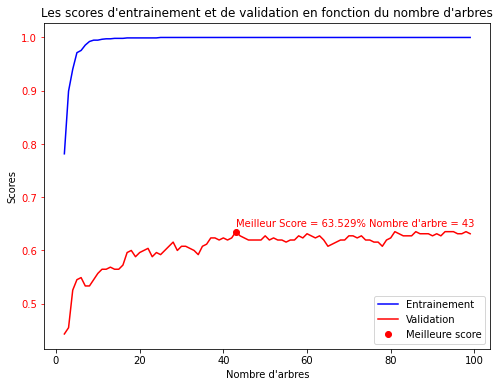

In [363]:
# Les scores d'entrainement et de validation en fonction du nombres d'arbres
max_score_index = np.argmax(valid_scores)
plt.figure(figsize=(8, 6))
plt.plot(n_trees, train_scores, 'b-', label='Entrainement')
plt.plot(n_trees, valid_scores, 'r-', label='Validation')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Scores')
plt.tick_params('y', colors='r')


# Meilleur score de validation
plt.plot(n_trees[max_score_index], valid_scores[max_score_index], 'ro', label='Meilleure score')
plt.annotate(f'Meilleur Score = {round(max(valid_scores)*100, 3)}% Nombre d\'arbre = {round(n_trees[max_score_index], 5)}',
             xy=(n_trees[max_score_index], valid_scores[max_score_index]+0.01), color='red')

# Legende et titre
plt.legend(loc='best')
plt.title('Les scores d\'entrainement et de validation en fonction du nombre d\'arbres')

# Show the plot
plt.show()

A travers le graphique, on remarque que plus il y a d'arbres, plus le modèle est précis jusqu'à atteindre une précision de 79,6%.

Après 80 arbres, la perfomance du modèle se détériore sur de nouvelles données. C'est le signe que notre modèle fait du sur-apprentissage après 80 arbres.

Nous allons nous limiter donc à 80 arbres pour faire les prédictions sur les données futures.

In [364]:
rf = RandomForestClassifier(n_estimators=n_trees[max_score_index], random_state=42).fit(X_train_scaled, data_train.label)
rf.score(X_test_scaled, data_test.label)

0.7725490196078432

On obtient un score de 76% sur les données de test. Notre modèle a une bonne capacité de généralisation.

### Soumission sur Kaggle

In [365]:
# Prédiction du modèle sur la dataset competition mise à l'échelle
pred = rf.predict(competition_scaled)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('random_forest_on_competition_scaled.csv', index=False)

## Régression Logistique

La regression logistique est une technique d'apprentissage supervisée utilisée pour la classification binaire. Le modèle utilise une fonction logistique (sigmoid) pour transformer une combinaison de variables d'entrée en une probabilité selon laquelle l'individu appartient ou non à classe donnée.

Si la fonction sigmoid obtient une probabilité supérieure à 0.5, alors la probabilité que l'individu appartient à une classe vaut 1, sinon l'individu n'appartient pas à cette classe et la probabilité vaut 0.

### Création du modèle

In [366]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, data_train.label)

LogisticRegression(max_iter=1000, random_state=42)

In [367]:
lr_model.score(data_valid.iloc[:,1:], data_valid.label)

0.3137254901960784

On obtient un score de 67,84% pour ce modèle. Cette performance est en dessous des autres classifieurs.

### Amélioration du modèle

#### Multinomial classes

Nous faisons prédictions sur des données qui peuvent être de plusieurs classes différentes (plus de deux classes différentes).

On peut utiliser un modèle de regression multinomial en précisant le paramètre **muli_class** de la fonction LogisticRegression à *multinomial*

In [368]:
mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
mc_model.fit(X_train_scaled, data_train.label)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [369]:
mc_model.score(data_valid.iloc[:,1:], data_valid.label)

0.3137254901960784

#### Polynomial Features

Ce modèle ne permet pas d'améliorer les performances.

Une autre technique est utilisée en régression logistique pour ajouter des ***variables polynomiales (polynomial features)*** au jeu de données avant d'entrainer le modèle.

L'ajout de ces caractéristiques polynomiales peut aider à modéliser des relations plus complexes entre les variables et la variable cible.

In [370]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_valid_poly = poly.transform(data_valid.iloc[:,1:])
X_test_poly = poly.transform(X_test_scaled)
X_train_poly.shape

(1190, 525825)

La dimension du jeu de données a considérablement augmentée avec la transformation PolynomialFeatures.

Ce jeu de données sera très long à entrainer et peut conduire au sur-apprentissage. Il existe des méthodes pour réduire les dimensions : 
- La méthode Lasso (L1 normalizer) 
- La méthode Ridge (L2 normalizer) 
- PCA (Principal Composent Analysis) qui réduit la dimensionnalité tout en conservant les informations utiles

Pour ce cas précis, on gardera le modèle précedent pour faire nos futures prédictions.

In [371]:
mc_model.score(X_test_scaled, data_test.label)

0.6823529411764706

### Soumission sur Kaggle

In [372]:
# Prédiction du modèle sur competition mise à l'échelle
pred = mc_model.predict(competition_scaled)
print(pred)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('logistic_regression_on_competition_scaled.csv', index=False)

[22 16 16 18 16  6 18 22 18 18  2  6 22 22 18  1 18  6 18 12 12  1 22 12
 12  1 16 18  2  2  1  2 18  1 18 22  1  2  1 18 16 22  2  6  2 16  6 16
  6 18 16  1 12 12 18 22 22  6 22 18 18 16 18 22 18 18  2 22 12 16 18  6
 22 22  1 18  2 22 18  1 22 12  1  6 22 18  1 12 12  2 22 22 22 22  2 22
  1 12 22 12 22 12 16  6  6 18  6  2  6  2 16  2 18  1 16  2  2 18 18 18
  1 16 22 16 12 16  1  2 22 22 12 22 18 22 12  2 18  2  1 12 22  6 22 22
  6 18 22 22 12 18 18 18  1  6 16  6  6 16 12 12  1 18 22  6 16 22  6 18
  1  1 18  2  2 16 16 16 12  6  2  1 12  2  1 18 12 22 12 22 18 16 18  1
  1 16 18  6 12  1 22  2  1 18 22 12  2 22  1  1 12 12 16  6 18  6 18  6
 18 18 16  2  1  1 18 22 22  2  1  1  2  6 18  6 22  6  6 16  2  1 18 22
 18 16 22 18  6 22 22 18 18  6  2 18 16  2 16 12 12 12  2 18  2  1  6 16
  6  6  6  2  2 22  6  2  6 22  2  6 18 22  2 22 12  6 12  6 16  6  2 18
  1 18 12 22 12 16 16 18  1  2 16 16  2 22 12  6 22  6 16  2 12  2 12  6
 18  1 22  2 12 16 12  6  1  6  6 16 22 18 22  2 18

## Neural networks

In [373]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

### Création du modèle

In [374]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [375]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [376]:
history = model.fit(X_train_scaled, data_train.label, epochs=50, batch_size=32, validation_data=(data_valid.iloc[:,1:], data_valid.label))

Epoch 1/50
38/38 [==============================] - 2s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0126 - val_loss: 0.0000e+00 - val_accuracy: 0.1098
Epoch 2/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0059 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0050 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0042 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0042 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 6/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0042 - val_loss: 0.0000e+00 - val_accuracy: 0.0980
Epoch 7/50
38/38 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0042 - val_los

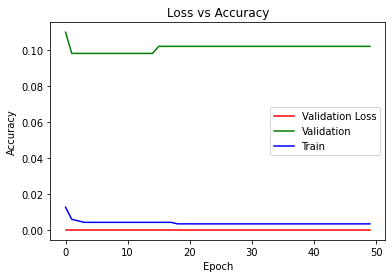

In [377]:
# Plot training & validation accuracy values
plt.plot(np.absolute(history.history['val_loss']), 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Ce modèle est très mauvais pour prédire les valeurs. L'erreur augmente à chaque itération et la précision ne s'améliore pas.

Notre objectif est de minimiser le **loss** (la perte ou l'erreur de prédiction du modèle) tout en essayant d'augmenter l'**accuracy** (la précision de prédiction).

La loss est une mesure de la différence entre les prédictions du modèle et les vraies étiquettes.

On peut améliorer ce modèle par plusieurs techniques : 
- en utilisant un label binarizer
- en ajoutant plus de couches cachées
- en ajoutant des fonctions d'activation aux couches
- en ajoutant des régulateurs (Dropout) aux couches

### Amélioration du modèle

#### Label Binarization

Comme la cible est ici multi-classes nous devons adapter notre modèle à prédire des valeurs binaires en sortie.

Le Label binarizer permet de modifier la forme de la cible en un vecteur de la taille du nombre de classes différentes.

In [378]:
lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(data_train.label)
train_labels_binarized = pd.DataFrame(train_labels_binarized)

valid_labels_binarized = lb.transform(data_valid.label)
valid_labels_binarized = pd.DataFrame(valid_labels_binarized)

test_labels_binarized = lb.transform(data_test.label)
test_labels_binarized = pd.DataFrame(test_labels_binarized)


train_labels_binarized

,0,1,2,3,4,5,6
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1185,0,0,0,0,0,0,1
1186,0,0,0,1,0,0,0
1187,0,0,0,0,0,0,1
1188,0,0,1,0,0,0,0


On obtient un vecteur de taille 7 avec des zéros partout sauf à la position correspondant à la valeur de la classe où il devrait y avoir un 1. Mais les valeurs de la cible devraient commencer à 0 (ici elles commencent à 1).

In [379]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(7)
])

In [380]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [381]:
history = model.fit(X_train_scaled, train_labels_binarized, epochs=50, batch_size=32, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50
38/38 [==============================] - 1s 12ms/step - loss: 0.9199 - accuracy: 0.4471 - val_loss: 0.5861 - val_accuracy: 0.3412
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.5638 - accuracy: 0.6891 - val_loss: 0.5162 - val_accuracy: 0.3843
Epoch 3/50
38/38 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.7361 - val_loss: 0.4539 - val_accuracy: 0.3922
Epoch 4/50
38/38 [==============================] - 0s 7ms/step - loss: 0.3273 - accuracy: 0.7857 - val_loss: 0.3898 - val_accuracy: 0.3765
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.2450 - accuracy: 0.8176 - val_loss: 0.3578 - val_accuracy: 0.3843
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.1848 - accuracy: 0.8454 - val_loss: 0.3739 - val_accuracy: 0.3765
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.1524 - accuracy: 0.8622 - val_loss: 0.3986 - val_accuracy: 0.3686
Epoch 8/50
38/38 [=

In [382]:
max_score_index = np.argmax(history.history['val_accuracy'])

print(f'{history.history["val_loss"][max_score_index]} --> {history.history["val_accuracy"][max_score_index]}')

0.4538566470146179 --> 0.3921568691730499


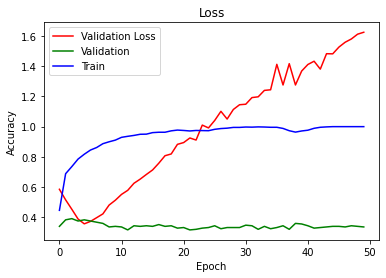

In [383]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Le résultat obtenu est beaucoup mieux. En particulier sur le jeu d'apprentissage, la précision atteint 1.0 au fur et à mesure de l'apprentissage.

La précision sur la validation a aussi augmentée même si elle chute après quelques epochs.

Qaunt à la perte sur la validation, elle n'est plus linéaire comme au départ.
Le modèle peut encore être amélioré.


#### Ajouter plus de couches

On peut augmenter le nombre de couches cachées du modèle précédent et voir si le modèle fait mieux.

In [384]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(7)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [385]:
history = model.fit(X_train_scaled, train_labels_binarized, epochs=50, batch_size=32, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50
38/38 [==============================] - 3s 36ms/step - loss: 0.9044 - accuracy: 0.4563 - val_loss: 0.5784 - val_accuracy: 0.3804
Epoch 2/50
38/38 [==============================] - 1s 25ms/step - loss: 0.5746 - accuracy: 0.6546 - val_loss: 0.4793 - val_accuracy: 0.4157
Epoch 3/50
38/38 [==============================] - 1s 26ms/step - loss: 0.3900 - accuracy: 0.7345 - val_loss: 0.3575 - val_accuracy: 0.5529
Epoch 4/50
38/38 [==============================] - 1s 26ms/step - loss: 0.2617 - accuracy: 0.7748 - val_loss: 0.3822 - val_accuracy: 0.4980
Epoch 5/50
38/38 [==============================] - 1s 16ms/step - loss: 0.2098 - accuracy: 0.8202 - val_loss: 0.4136 - val_accuracy: 0.3451
Epoch 6/50
38/38 [==============================] - 1s 19ms/step - loss: 0.1814 - accuracy: 0.8370 - val_loss: 0.5061 - val_accuracy: 0.3569
Epoch 7/50
38/38 [==============================] - 1s 18ms/step - loss: 0.1625 - accuracy: 0.8647 - val_loss: 0.6151 - val_accuracy: 0.3059
Epoch 8/50
38

In [386]:
np.max(history.history['val_accuracy']) * 100

55.29412031173706

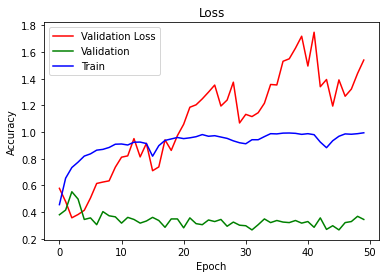

In [387]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Une très faible amélioration par rapport au modèle précédent. La perte augmente toujours. En plus le modèle réalise rélativement de bons scores sur les données d'entrainement, ce qui laisse croire qu'il y a sur-ajustement.

Il peut être intéressant d'ajouter des fonctions d'activation aux noeuds de notre modèle afin d'introduire de la non-linéarité dans les prédictions. Cela pourrait améliorer le modèle.

#### Ajouter des fonctions d'activation aux couches

Les fonctions d'activation vont permettre d'ajouter de la non-linéarité aux données. L'idée est d'essayer plusieurs fonctions d'activation et de garder celles qui donnent la meilleure performance.

On utilise très souvent les fonctions suivantes :

- **Sigmoid** : cette fonction d'activation fait correspondre tout nombre réel à l'intervalle [0, 1]. Elle est couramment utilisée comme fonction d'activation pour les problèmes de classification binaire.

- **ReLU (Rectified Linear Unit)** : Cette fonction d'activation est une fonction linéaire par morceaux qui renvoie l'entrée si elle est positive et 0 sinon. Elle est largement utilisée dans les modèles d'apprentissage profond car elle est efficace sur le plan computationnel et contribue à prévenir le problème de disparition du gradient.

- **Leaky ReLU** : Il s'agit d'une variation de la fonction ReLU qui permet un petit gradient non nul lorsque l'entrée est négative, ce qui peut aider à éviter les neurones morts.

- **Tanh (tangente hyperbolique)** : Cette fonction d'activation renvoie une valeur entre -1 et 1, ce qui peut être utile pour certains types de données. C'est également une version lissée de la fonction escalier, ce qui la rend plus facile à optimiser à l'aide de méthodes basées sur les gradients.

- **Softmax** : Il s'agit d'une généralisation de la fonction sigmoïde qui peut être utilisée pour des problèmes de classification multiclasse. Elle cartographie la sortie de la dernière couche sur une distribution de probabilité sur les différentes classes.

In [388]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [389]:
history = model.fit(X_train_scaled, train_labels_binarized, epochs=50, batch_size=100, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 2s 45ms/step - loss: 0.4203 - accuracy: 0.3706 - val_loss: 0.3841 - val_accuracy: 0.3922
Epoch 2/50
 1/12 [=>............................] - ETA: 0s - loss: 0.3309 - accuracy: 0.6300

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 0s 28ms/step - loss: 0.3049 - accuracy: 0.6782 - val_loss: 0.3490 - val_accuracy: 0.4980
Epoch 3/50
12/12 [==============================] - 0s 28ms/step - loss: 0.2502 - accuracy: 0.8227 - val_loss: 0.3324 - val_accuracy: 0.5216
Epoch 4/50
12/12 [==============================] - 0s 24ms/step - loss: 0.2024 - accuracy: 0.9067 - val_loss: 0.3386 - val_accuracy: 0.4275
Epoch 5/50
12/12 [==============================] - 0s 24ms/step - loss: 0.1620 - accuracy: 0.9529 - val_loss: 0.3416 - val_accuracy: 0.3765
Epoch 6/50
12/12 [==============================] - 0s 25ms/step - loss: 0.1307 - accuracy: 0.9765 - val_loss: 0.3357 - val_accuracy: 0.4118
Epoch 7/50
12/12 [==============================] - 0s 25ms/step - loss: 0.1074 - accuracy: 0.9941 - val_loss: 0.3247 - val_accuracy: 0.4549
Epoch 8/50
12/12 [==============================] - 0s 24ms/step - loss: 0.0906 - accuracy: 0.9966 - val_loss: 0.3257 - val_accuracy: 0.4588
Epoch 9/50
12/12 [======

In [390]:
np.max(history.history['val_accuracy']) * 100

52.15686559677124

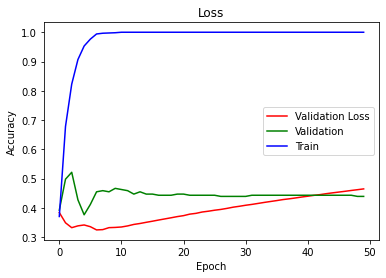

In [391]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Le modèle est meilleur. La perte baisse considérablement et la performance est plutôt bonne tant sur les données d'entrainement (100%) que sur les données de validation (81%).

Cependant, si ce resultat est satisfaisant, le fait que le e score d'apprentissage atteint 1 et reste bloqué tandis que le score de validation atteint un plateau et se dégrade très légèrement, cela peut indiquer un sur-apprentissage (overfitting).

Une dernière tentative d'amélioration du modèle serait d'ajouter des regulateurs aux couches pour éviter le sur-apprentissage.

#### Regularisation des couches par Dropout

Le dropout est une technique de régularisation qui consiste à désactiver aléatoirement un certain nombre de neurones d'une couche lors de l'entraînement du modèle, afin d'éviter la suradaptation (overfitting) et d'améliorer la généralisation du modèle.

In [392]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [393]:
history = model.fit(X_train_scaled, train_labels_binarized, epochs=50, batch_size=100, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 3s 47ms/step - loss: 0.5978 - accuracy: 0.1655 - val_loss: 0.4616 - val_accuracy: 0.1490
Epoch 2/50
 1/12 [=>............................] - ETA: 0s - loss: 0.5073 - accuracy: 0.1800

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 0s 34ms/step - loss: 0.4740 - accuracy: 0.1538 - val_loss: 0.4092 - val_accuracy: 0.2941
Epoch 3/50
12/12 [==============================] - 0s 27ms/step - loss: 0.4378 - accuracy: 0.1580 - val_loss: 0.4018 - val_accuracy: 0.2706
Epoch 4/50
12/12 [==============================] - 0s 32ms/step - loss: 0.4231 - accuracy: 0.1748 - val_loss: 0.3981 - val_accuracy: 0.3098
Epoch 5/50
12/12 [==============================] - 0s 33ms/step - loss: 0.4246 - accuracy: 0.1639 - val_loss: 0.3924 - val_accuracy: 0.3059
Epoch 6/50
12/12 [==============================] - 0s 29ms/step - loss: 0.4040 - accuracy: 0.2580 - val_loss: 0.3816 - val_accuracy: 0.3569
Epoch 7/50
12/12 [==============================] - 0s 25ms/step - loss: 0.3928 - accuracy: 0.2824 - val_loss: 0.3765 - val_accuracy: 0.3647
Epoch 8/50
12/12 [==============================] - 0s 32ms/step - loss: 0.3796 - accuracy: 0.3319 - val_loss: 0.3680 - val_accuracy: 0.3608
Epoch 9/50
12/12 [======

In [394]:
np.max(history.history['val_accuracy']) * 100

42.35294163227081

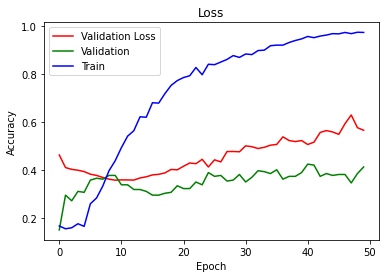

In [395]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Les regulateurs sont censés éviter le sur-apprentissage. La perte continue à descendre alors que les scores de validation et d'entrainement augmentent ensemble.

Le modèle a une bonne capacité de généralisation. On utilisera ce modèle pour prédire les données futures.

 ### Application sur données de tests

In [396]:
score = model.evaluate(X_test_scaled, test_labels_binarized)
score

8/8 [==============================] - 0s 6ms/step - loss: 0.2056 - accuracy: 0.7882


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


[0.20564401149749756, 0.7882353067398071]

### Soumission sur Kaggle

In [397]:
# Prédiction du modèle sur competition mise à l'échelle
NN_pred = model.predict(competition_scaled)
NN_pred
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = [np.argmax(pred, axis=0) for pred in NN_pred]
df.label

16/16 [==============================] - 0s 5ms/step


0      6
1      4
2      4
3      4
4      4
      ..
495    6
496    4
497    2
498    6
499    3
Name: label, Length: 500, dtype: int64

In [398]:
df.to_csv('neural_network_on_competition_scaled.csv', index=False)

## Conclusion

Parmi tous les modèles vus jusqu'actuellement, c'est le modèle svm_rbf qui réalise le plus grand score sur les données de compétition.

Le modèle Neural Network réalise une bonne performance sur les données de validation et de test, mais réalise un score très faible sur les données de compétition. Est-ce dû à un problème de mise à échelle ou de sur-ajustement ?

# Part 3 : Classifiers using HOG

Dans cette partie, nous allons utiliser une célèbre technique utilisé en computer vision pour extraire les caractéristiques d'une image : Histogram Oriented Gradients.

Le descripteur HOG calcule les gradients d'intensité de l'image, c'est-à-dire analyser les variations de couleurs et de luminosités dans l'image pour déterminer la direction des contours et des bords.
Ensuite, l'image est divisée en petites zones et on calcule un histogramme de pixels similaires sur chaque zone. Les histogrammes obtenus forment un vecteur qui caractérise l'image.

Ici, nous allons associer cette technique à nos classifieurs pour améliorer nos prédictions.

## Préparation

In [399]:
# my_hog prend une ligne du jeu de données représentant une image en niveaux de gris 32x32 sous forme pandas.DataFrame et calcule les caractéristiques 'hog' pour cette image 
# row correspond à l'image brut
# ori correspond aux orientations possibles
# cell correspond à la division de l'image
def my_hog(row, ori, cell):
  # Extraction des caractéristiques grâce à HOG
  hog_features = hog(row.to_numpy().reshape(32,32), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(4,4))

  # Normalisation L2 des vecteurs de caractéristiques HOG
  hog_features_normalized = normalize(hog_features.reshape(1,-1), norm='l2')

  return pd.Series(hog_features_normalized.reshape(hog_features.shape[0],))

In [400]:
data_train_hog, data_test_hog = train_test_split(dataset, test_size=0.30, random_state=4)
data_valid_hog, data_test_hog = train_test_split(data_test_hog, test_size=0.5, random_state=42)

In [401]:
data_train = data_train_hog.drop('label', axis=1).apply(my_hog, axis=1, args=(2,4))
data_valid = data_valid_hog.drop('label', axis=1).apply(my_hog, axis=1, args=(2,4))
data_test = data_test_hog.drop('label', axis=1).apply(my_hog, axis=1, args=(2,4))
data_train.insert(0, 'label', data_train_hog.label)
data_valid.insert(0, 'label', data_valid_hog.label)
data_test.insert(0, 'label', data_test_hog.label)

In [402]:
data_train

,label,0,1,2,3,4,5,6,7,8,...,790,791,792,793,794,795,796,797,798,799
248,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
436,16,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1507,16,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.031096,0.059048,0.059048,0.010994,0.0,0.0,0.0,0.0
1134,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1291,12,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,22,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.021405,0.072047,0.064214,0.000000,0.0,0.0,0.0,0.0
710,12,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.041268,0.058362,0.000000,0.000000,0.0,0.0,0.0,0.0
440,22,0.0,0.0,0.0,0.0,0.0,0.0,0.044661,0.04737,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
175,6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,...,0.0,0.0,0.037397,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [403]:
competition = competition.apply(my_hog, axis=1, args=(2,4))

In [404]:
competition

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.032142,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.062388,0.080361,0.020796,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039472,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## Decision Tree Classifier

L'arbre de décision est un modèle d'apprentissage automatique utilisé pour les problème de classification ou de régression. Il consiste à construire un arbre à partir de données d'entraînement en effectuant des séparations successives sur les variables au fur et à mesure qu'on descend dans l'arbre pour créer des sous-ensembles homogènes en termes de variable cible.
La division se fait en se basant sur une fonction d'impureté comme l'indice de Gini ou l'entropie. L'arbre est construit en choisissant la division qui maximise la réduction de l'impureté ou le gain d'information. 
Les feuilles de l'arbre sont utilisées pour prédire la valeur de la variable cible pour de nouvelles observations.

### Création du modèle

In [405]:
dt = DecisionTreeClassifier(random_state = 42).fit(data_train.iloc[:,1:], data_train.label)

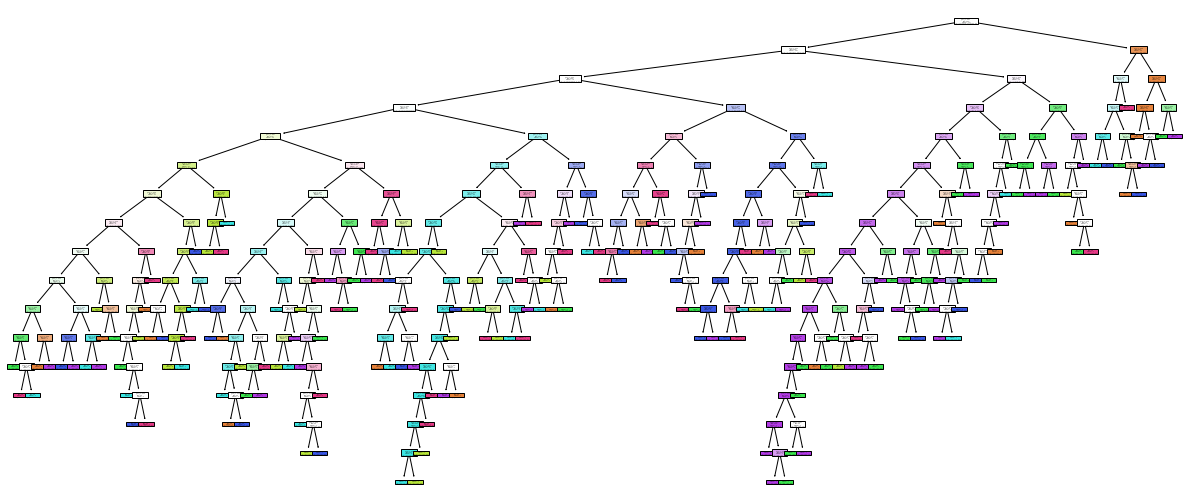

In [406]:
plt.figure(figsize=(21, 9))
plot_tree(dt, filled=True)
plt.show()

In [407]:
print(f'Profondeur de l\'arbre : {dt.tree_.max_depth} ; Nombre de noeuds : {len(dt.tree_.impurity)} ; Nombre de feuilles : {dt.tree_.n_leaves}')
print(f'Impureté à la racine : {round(dt.tree_.impurity[0], 3)*100}% ; Impureté au dernier noeud : {round(dt.tree_.impurity[len(dt.tree_.impurity)-1], 3)*100}%')

Profondeur de l'arbre : 16 ; Nombre de noeuds : 369 ; Nombre de feuilles : 185
Impureté à la racine : 85.7% ; Impureté au dernier noeud : 0.0%


Profondeur de l'arbre : 28 ; Nombre de noeuds : 631 ; Nombre de feuilles : 316
Impureté à la racine : 85.7% ; Impureté au dernier noeud : 0.0%

In [408]:
dt.score(data_train.iloc[:,1:], data_train.label)

1.0

In [409]:
dt.score(data_valid.iloc[:,1:], data_valid.label)

0.7058823529411765

Le modèle fait un score (de précision) de 100% sur le jeu d'apprentissage alors qu'il ne fait que 70,98% sur le jeu de validation.
Il y a une grande amélioration par rapport au modèle d'arbre de décision simple sans hog (53%).


Nous allons tracer la courbe de complexité du modèle. C'est-à-dire tracer la performance du modèle sur l'ensemble d'entraînement et l'ensemble de validation en fonction de la complexité du modèle. 
La courbe de validation permet de visualiser l'évolution de la performance du modèle en fonction d'une hyper-paramètre spécifique (par exemple, la profondeur maximale de l'arbre de décision).
Si la performance sur l'ensemble de validation atteint un seuil ou diminue alors que la performance sur l'ensemble d'entraînement continue d'augmenter, cela pourrait indiquer un sur-apprentissage.

Pour cela nous utiliserons la fonction scikit-learn validation_curbe(). Nous allons utiliser la validation

In [410]:
tree = DecisionTreeClassifier(random_state = 42)
param_range = np.arange(1, dt.tree_.max_depth+1)

# Calculer les scores d'apprentissage et de validation pour chaque valeur de profondeur maximale
train_scores, valid_scores = validation_curve(
    tree, data_train.iloc[:,1:], data_train.label, param_name='max_depth', param_range=param_range, cv=5
)

# Calculer les moyennes et écarts-types des scores d'apprentissage et de validation pour chaque valeur de profondeur maximale
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


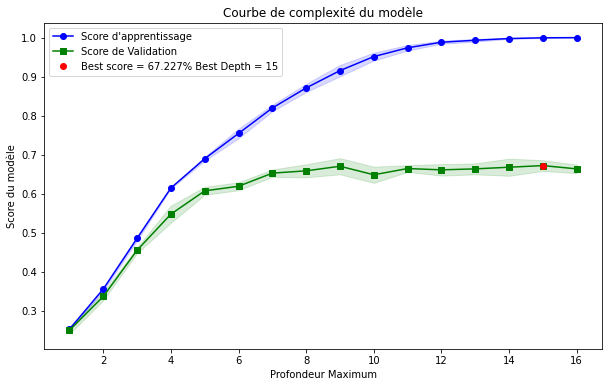

In [412]:
valid_max_index = np.argmax(valid_mean)
best_depth_index = param_range[valid_max_index]

# Tracer la courbe de complexité
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Score d\'apprentissage', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(param_range, valid_mean, label='Score de Validation', color='green', marker='s')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.15, color='green')

# Plot best validation score
plt.plot(param_range[valid_max_index], valid_mean[valid_max_index], 'ro', label=f'Best score = {round(valid_mean[valid_max_index]*100, 3)}% Best Depth = {round(param_range[valid_max_index], 5)}')


plt.title('Courbe de complexité du modèle')
plt.xlabel('Profondeur Maximum')
plt.ylabel('Score du modèle')
plt.legend(loc='best')
plt.show()

Plus on descend en profondeur dans l'arbre, plus l'arbre sépare correctement les données d'apprentissage. 

Quant aux données de validation, le modèle s'est amélioré. On remarque que la meilleure profondeur est 15.

Cependant, la courbe de validation stagne à partir du niveau 10 dans l'arbre alors que la courbe d'entraienement continue de monter, il semble que nous sommes face à un cas de sur-ajustement.

### Amélioration du modèle

Nous allons élaguer l'arbre en supprimant les noeuds qui ne permettent pas d'apporter une précision significative au modèle.

In [413]:
tree = DecisionTreeClassifier(random_state = 42)
path = tree.cost_complexity_pruning_path(data_train.iloc[:,1:], data_train.label)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Le paramètre ccp_alpha correspond à la pénalité appliquée pour reduire le nombre de noeuds.

In [414]:
# Initialisation des scores
train_scores, valid_scores = [], []
# Entrainer et évaluer le modèle pour différentes valeurs de l'hyper-paramètre alpha (=complexité)
for alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(ccp_alpha=alpha, random_state = 42)
    dtc.fit(data_train.iloc[:,1:], data_train.label)
    train_scores.append(dtc.score(data_train.iloc[:,1:], data_train.label))
    valid_scores.append(dtc.score(data_valid.iloc[:,1:], data_valid.label))

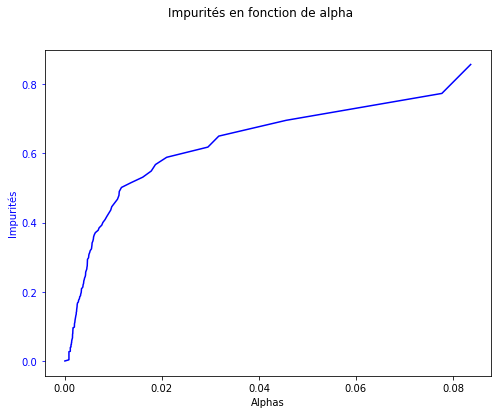

In [415]:
# Tracé des impurités en fonction de ccp_alphas
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, impurities, 'b-')
plt.ylabel('Impurités', color='b')
plt.xlabel('Alphas')
plt.tick_params('y', colors='b')
plt.suptitle('Impurités en fonction de alpha')

plt.show()

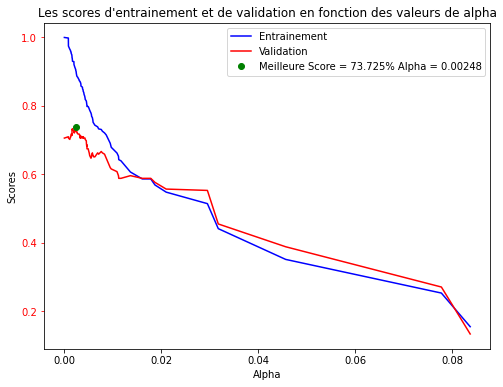

In [416]:
# Les scores d'entrainement et de validation en fonction des valeurs de alpha
max_score_index = np.argmax(valid_scores)

plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, 'b-', label='Entrainement')
plt.plot(ccp_alphas, valid_scores, 'r-', label='Validation')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.tick_params('y', colors='r')

# Plot best validation score
plt.plot(ccp_alphas[max_score_index], valid_scores[max_score_index], 'go', label=f'Meilleure Score = {round(valid_scores[max_score_index]*100, 3)}% Alpha = {round(ccp_alphas[max_score_index], 5)}')

# Add legends and title
plt.legend(loc='best')
plt.title('Les scores d\'entrainement et de validation en fonction des valeurs de alpha')

# Show the plot
plt.show()

Une grande valeur de alpha a pour conséquence de réduire le nombre de noeuds et donc, d'ajouter l'impureté dans l'arbre de décision sur le jeu d'entrainement.
Par contre, une valeur trop faible ne permet pas d'optimiser l'arbre.
La valeur de alpha qui donne le meilleur score sur le jeu de validation (73,725%) est 0.000235.

In [417]:
dt_pruned = DecisionTreeClassifier(ccp_alpha=ccp_alphas[max_score_index], random_state = 42)
dt_pruned.fit(data_train.iloc[:,1:], data_train.label)
print(f'Profondeur de l\'arbre : {dt_pruned.tree_.max_depth} ; Nombre de noeuds : {len(dt_pruned.tree_.impurity)} ; Nombre de feuilles : {dt_pruned.tree_.n_leaves}')
print(f'Impureté à la racine : {round(dt_pruned.tree_.impurity[0], 3)*100}% ; Impureté au dernier noeud : {round(dt_pruned.tree_.impurity[len(dt_pruned.tree_.impurity)-1], 3)*100}%')

Profondeur de l'arbre : 12 ; Nombre de noeuds : 153 ; Nombre de feuilles : 77
Impureté à la racine : 85.7% ; Impureté au dernier noeud : 44.4%


Le nombre de noeuds dans l'arbre a été reduit.

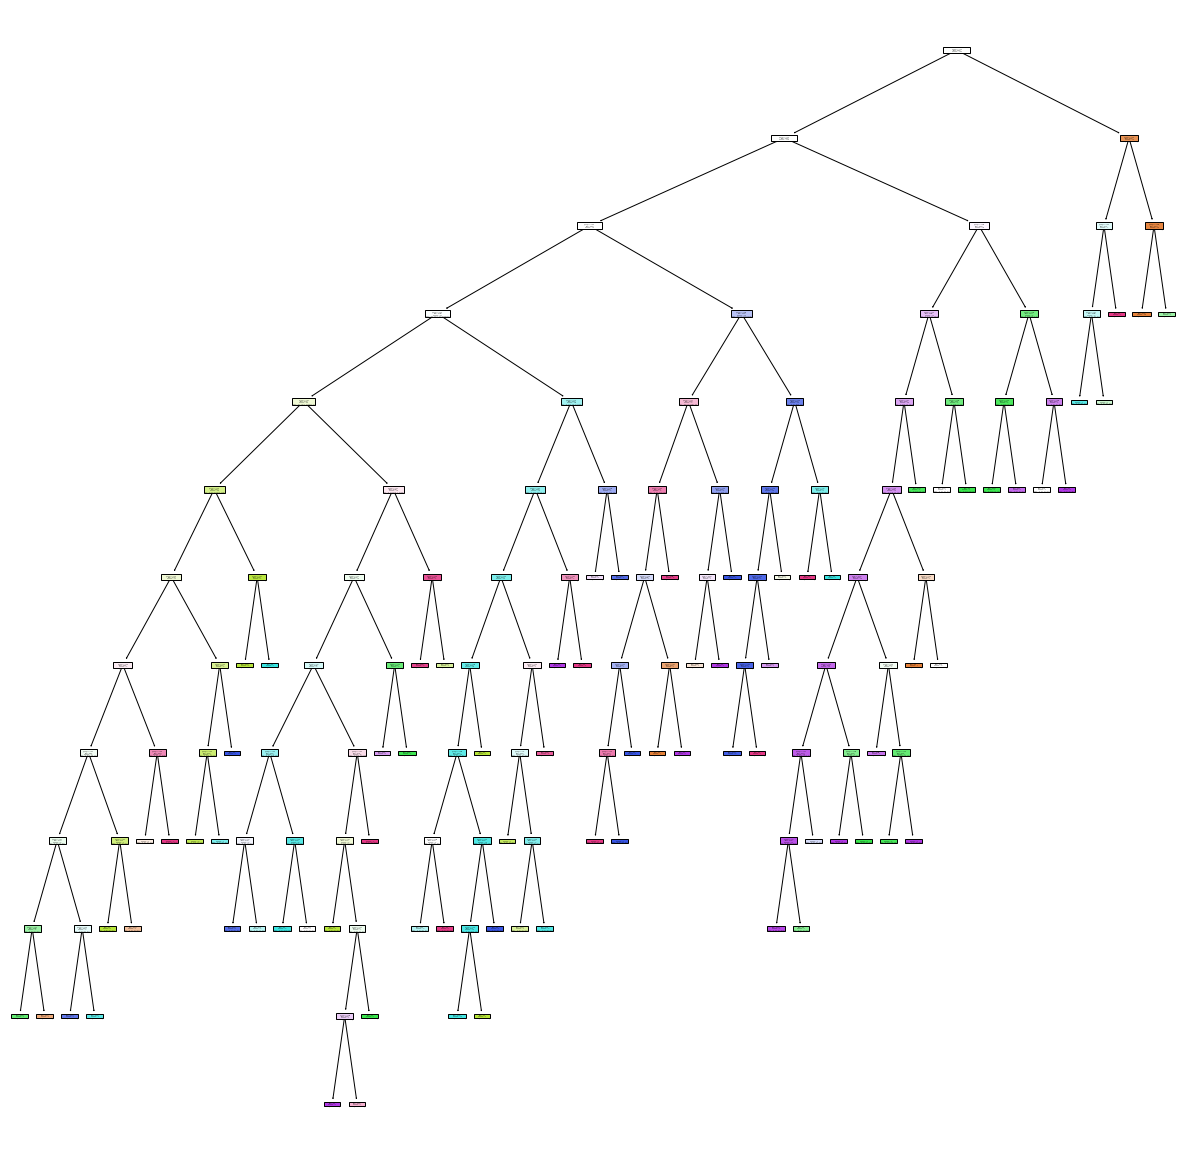

In [418]:
plt.figure(figsize=(21, 21))
plot_tree(dt_pruned, filled=True)
plt.show()

In [419]:
print(dt_pruned.score(data_train.iloc[:,1:], data_train.label))
print(dt_pruned.score(data_valid.iloc[:,1:], data_valid.label))

0.8941176470588236
0.7372549019607844


L'élégage de l'arbre a eu pour effet de diminuer la profondeur de l'arbre ainsi que le nombre de feuilles.
Il y amélioration sur le score de validation = 73,72% sur le jeu de validation. C'est le plus haut score qu'on puisse obtenir avec l'arbre de décision.
Quel est le score pour de nouvelles données ? Appliquons notre modèle sur le jeu de test.

In [420]:
print(dt_pruned.score(data_test.iloc[:,1:], data_test.label))

0.7137254901960784


Le modèle amélioré atteint un score de 70.98% sur le jeu de tests, mieux que le modèle sans HOG.

### Soumission des résultats sur Kaggle

In [421]:
# Prédiction du modèle dt_pruned sur la dataset competition
pred = dt_pruned.predict(competition.iloc[:,:])
pred

array([22, 16, 18, 16, 16, 18,  6, 22, 18,  6,  2, 18,  6,  2, 18,  1, 22,
       18, 18, 22,  2,  1, 18,  2, 12,  1, 16,  1,  1, 16, 18,  2,  6,  1,
       18,  2,  1,  1,  1, 18,  2, 22,  2,  6, 22, 18, 12, 22,  1, 18, 12,
        1, 12, 22,  6,  2, 22,  2, 12, 18, 18,  6,  1, 18, 18,  6,  2,  6,
       16, 18, 18,  6, 22,  6,  2,  6, 16, 22, 16,  1, 16,  2,  1,  6,  2,
        6,  1, 12, 18, 12, 12, 16, 22, 22, 12, 22,  1, 22,  2, 12, 16,  6,
       16,  6, 16, 12,  2,  2, 18,  2, 18,  2,  2, 16, 16,  2,  1,  2, 18,
        6, 18, 22, 22, 16, 12, 16,  1,  2,  1,  2,  6, 12,  6, 12,  2,  2,
       18,  2,  1, 12,  2,  6, 22, 12, 22, 18,  6, 22, 12,  6,  6,  6,  1,
       18, 16,  6,  6, 16, 12, 22,  1,  2, 22, 18, 16, 16, 18, 16,  1,  1,
       18,  2,  2, 16, 16,  6, 22, 12,  1,  1, 18, 16,  1,  6, 12, 12,  2,
        2, 18, 16, 18,  1,  1, 16, 18,  6, 22,  1,  1,  2,  1, 18, 22,  2,
        2, 18,  1,  1, 12,  6, 16,  2,  1, 12,  6, 18, 18, 18, 12,  2,  1,
        1,  1,  1, 22,  2

In [422]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,22
1,2,16
2,3,18
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,16


In [423]:
df.to_csv('decision_tree_with_hog_on_competition.csv', index=False)

## SVM

On fera les mêmes manipulations que dans la première partie.
Ici, nos données sont déjà normalisées, on n'a plus besoin de les mettre à échelle.

### SVM Linéaire

#### Création du modèle

In [424]:
model_svm = SVC(C = 1000, kernel = 'linear', random_state=42).fit(data_train.iloc[:,1:], data_train.label)

In [425]:
model_svm.score(data_train.iloc[:,1:], data_train.label)

1.0

In [426]:
# Sur le jeu de validation
model_svm.score(data_valid.iloc[:,1:], data_valid.label)

0.8705882352941177

On obtient une précision de 87,84% sur le jeu de validation. Ce qui est très au-dessus du premier modèle sans HOG.

Ce modèle donne des performances satisfaisantes, néanmoins on essaiera de l'améliorer en jouant sur le paramètre C.

#### Ajustement du modèle

Le modèle peut être amélioré en jouant sur le paramètre C

In [427]:
c_values = np.logspace(-3, 3, num=20)
train_scores, valid_scores = [], []
for c in c_values:
    model_svm = SVC(C = c, kernel = 'linear', random_state=42).fit(data_train.iloc[:, 1:], data_train.label)
    train_scores.append(model_svm.score(data_train.iloc[:, 1:], data_train.label))
    valid_scores.append(model_svm.score(data_valid.iloc[:, 1:], data_valid.label))
    
max_score_index = np.argmax(valid_scores)
print(f'Meilleur valeur de C: {c_values[max_score_index]}, Score associé: {round(max(valid_scores)*100,3)}')

Meilleur valeur de C: 26.366508987303554, Score associé: 89.02


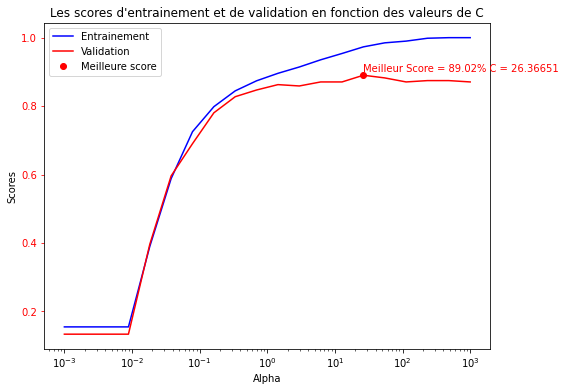

In [428]:
# Les scores d'entrainement et de validation en fonction des valeurs de C
max_score_index = np.argmax(valid_scores)
plt.figure(figsize=(8, 6))
plt.plot(c_values, train_scores, 'b-', label='Entrainement')
plt.plot(c_values, valid_scores, 'r-', label='Validation')
plt.xlabel('Alpha')
plt.ylabel('Scores')
plt.tick_params('y', colors='r')
plt.xscale('log')

# Meilleur score de validation
plt.plot(c_values[max_score_index], valid_scores[max_score_index], 'ro', label='Meilleure score')
plt.annotate(f'Meilleur Score = {round(max(valid_scores)*100, 3)}% C = {round(c_values[max_score_index], 5)}',
             xy=(c_values[max_score_index], valid_scores[max_score_index]+0.01), color='red')

# Legende et titre
plt.legend(loc='best')
plt.title('Les scores d\'entrainement et de validation en fonction des valeurs de C')

# Show the plot
plt.show()

Le meilleur score est obtenu avec le paramètre C=26,36651 et est de 89%. Au-delà de C=26,36651, le modèle risque de tomber dans du sur-ajustement.

In [429]:
model_svm = SVC(C = c_values[max_score_index], kernel = 'linear', random_state=42).fit(data_train.iloc[:,1:], data_train.label)
model_svm.score(data_test.iloc[:,1:], data_test.label)

0.8941176470588236

On obtient un score de 89,41% sur le jeu de test. Ce score est au-dessus du score de validation et très au-dessus du score obtenu lors de la première phase. Notre modèle généralise bien.

#### Soumission des résultats sur Kaggle

In [430]:
# Prédiction du modèle sur la dataset competition mise à échelle
pred = model_svm.predict(competition)
pred

array([22, 16,  6, 16, 16,  6,  6, 22, 18,  6,  2,  6,  6, 22,  6,  1, 22,
       18, 18, 22,  2,  1, 16, 12, 12,  1, 16, 18,  1, 18, 18,  2, 18,  1,
       18,  2,  1,  1,  1, 18, 16, 22,  2,  6,  2, 16, 18, 22,  1, 18,  6,
        1, 12, 22, 18,  2, 22,  2, 12, 18,  6, 22,  6, 22,  6, 18,  2, 22,
       16, 16, 18,  6, 16,  6, 18,  6,  2, 22,  1,  1, 22,  2,  1,  6, 22,
        6,  1, 12, 18,  2, 22, 16, 22, 22, 12, 22,  1, 22,  2, 12, 16, 12,
       16,  6, 16, 16,  2,  2, 18, 12, 22,  2, 12,  1, 18,  2, 18, 16, 18,
       18,  1, 22, 22, 16, 12, 16,  1,  2, 22,  2,  6, 16, 18, 16,  2,  6,
       18,  2,  1, 12, 12,  6, 22,  2, 22, 18,  6,  2, 12, 18,  2,  6,  1,
       18, 16,  6, 18, 16,  2, 22,  1,  6, 22, 18, 16, 22, 18, 16,  1,  1,
       18, 12,  2,  6, 16,  6, 22, 12,  2,  1, 16, 22,  1, 18,  2, 12, 22,
        2, 18, 16, 18,  1,  1, 22,  6,  6, 22,  1,  2,  2,  1, 18, 22,  2,
        2, 18,  1,  1, 12,  6,  2,  6,  1,  2, 18,  6, 18, 18, 12,  2,  1,
        1, 18, 22, 22,  2

In [431]:
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df

,Id,label
0,1,22
1,2,16
2,3,6
3,4,16
4,5,16
...,...,...
495,496,22
496,497,16
497,498,6
498,499,22


In [432]:
df.to_csv('svm_linear_with_hog_on_competition.csv', index=False)

On est parvenu à augmenter la précision de notre modèle linéaire en changeant le paramètre C. 
Essayons de mettre de la non-linéarité dans notre modèle grâce au paramètre gamma et observons les performances du modèle.

### SVM Polynomiale

On maintient le paramètre C=26,36651 obtenu sur le modèle linéaire.

#### Création du modèle

In [433]:
model_svm_poly = SVC(C = c_values[max_score_index], kernel = 'poly', random_state=42).fit(data_train.iloc[:,1:], data_train.label)
print('Training score :', model_svm_poly.score(data_train.iloc[:,1:], data_train.label))
print('Validation score :',model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label))

Training score : 1.0
Validation score : 0.9215686274509803


Le score a augmenté par rapport au modèle précédent et est très largement au dessus du modèle sans HOG. 

Essayons de voir l'impact des valeurs de gamma et de C.

#### Amélioration du modèle

In [434]:
gammas = np.logspace(-3, 3, num=20)
train_scores, valid_scores = [], []
best_score = 0.0
best_gamma = 0.0
best_c = 0.001
for g in gammas:
    for c in c_values:
        model_svm_poly = SVC(C = c, kernel = 'poly', gamma=g, random_state=42).fit(data_train.iloc[:,1:], data_train.label)
        score = model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label)
        if score>best_score:
            best_score=score
            best_gamma = g
            best_c = c
        
print(f'Meilleur gamma: {best_gamma}, Meilleur C: {best_c} , Score associé: {best_score}')

Meilleur gamma: 0.07847599703514611, Meilleur C: 1000.0 , Score associé: 0.9254901960784314


In [435]:
model_svm_poly = SVC(kernel = 'poly', C = best_c, gamma=best_gamma).fit(data_train.iloc[:,1:], data_train.label)
model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label)

0.9254901960784314

On réussit à augmenter la performance du modèle en faisant un trade-off des paramètres C et gamma. Le modèle obtenu fait une précision de 93,33% sur le jeu de validation, meilleure que sur le modèle précédent.

In [436]:
model_svm_poly.score(data_test.iloc[:,1:], data_test.label)

0.9254901960784314

Le modèle a une précision de 91,76% sur le jeu de test. Ceci montre une très bonne capacité de généralisation.

#### Soumission sur Kaggle

In [437]:
# Prédiction du modèle dt_pruned sur la dataset competition
pred = model_svm.predict(competition)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('svm_poly_with_hog_on_competition.csv', index=False)

### SVM RBF

On gardera les mêmes valeurs d'hyper paramètres pour tester le modèle avec le noyeau RBF.

#### Création du modèle

In [438]:
model_svm_rbf = SVC(kernel = 'rbf', C = best_c, gamma=best_gamma, random_state=42).fit(data_train.iloc[:,1:], data_train.label)
print('Training score :', model_svm_rbf.score(data_train.iloc[:,1:], data_train.label))
print('Validation score :', model_svm_rbf.score(data_valid.iloc[:,1:], data_valid.label))

Training score : 1.0
Validation score : 0.8705882352941177


On obtient un score de validation bas par rapport au SVM polynomial. On peut faire varier les hyper-paramètres comme précedemment.

#### Amélioration du modèle du modèle.

In [439]:
best_score = 0.0
best_gamma = 0.0
best_c = 0.001
for g in gammas:
    for c in c_values:
        model_svm_poly = SVC(kernel = 'rbf', C = c, gamma=g, random_state=42).fit(data_train.iloc[:,1:], data_train.label)
        score = model_svm_poly.score(data_valid.iloc[:,1:], data_valid.label)
        if score>best_score:
            best_score=score
            best_gamma = g
            best_c = c
        
print(f'Meilleur gamma: {best_gamma}, Meilleur c: {best_c} , Score associé: {best_score}')

Meilleur gamma: 2.976351441631316, Meilleur c: 0.6951927961775606 , Score associé: 0.9372549019607843


Meilleur gamma: 2.976351441631316, Meilleur c: 0.6951927961775606 , Score associé: 0.9411764705882353.

Le score sur ce modèle est meilleur que précedemment.

In [440]:
model_svm_rbf = SVC(kernel='rbf', gamma=best_gamma, C=best_c, random_state=42).fit(data_train.iloc[:,1:], data_train.label)
model_svm_rbf.score(data_test.iloc[:,1:], data_test.label)

0.9294117647058824

On a un score de 92,54% sur le jeu de test, plus grand que sur les modèles précedents.

#### Soumission sur Kaggle

In [441]:
# Prédiction du modèle dt_pruned sur la dataset competition
pred = model_svm_rbf.predict(competition)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('svm_rbf_with_hog_on_competition.csv', index=False)

## K-nearest-neighbour

L'algorithme k-plus-proches-voisins est une méthode supervisée pour classifier les données en fonction de leurs similarités avec d'autres individus. Chaque individu est classé ensemble avec les k-voisins qui partagent majoritairement les mêmes traits que lui.

### Création du modèle

In [442]:
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(data_train.iloc[:,1:], data_train.label)

KNeighborsClassifier(n_neighbors=1)

In [443]:
model_1nn.score(data_valid.iloc[:,1:], data_valid.label)

0.8980392156862745

On obtient une précision de 88,62% sur le jeu de validation. Ce score est meilleur que sur le modèle sans HOG.

On va essayer d'améliorer ce score en augmentant le nombre de voisins K.

### Amélioration du modèle

In [444]:
# On prend un nombre de voisins entre 1 100 par pas de 2 voisins.
k_neighbors = []
valid_scores, train_scores = [], []
for k in range(1, 100, 2):
    k_neighbors.append(k)
    model = KNeighborsClassifier(n_neighbors=k).fit(data_train.iloc[:,1:], data_train.label)
    train_scores.append(model.score(data_train.iloc[:, 1:], data_train.label))
    valid_scores.append(model.score(data_valid.iloc[:, 1:], data_valid.label))

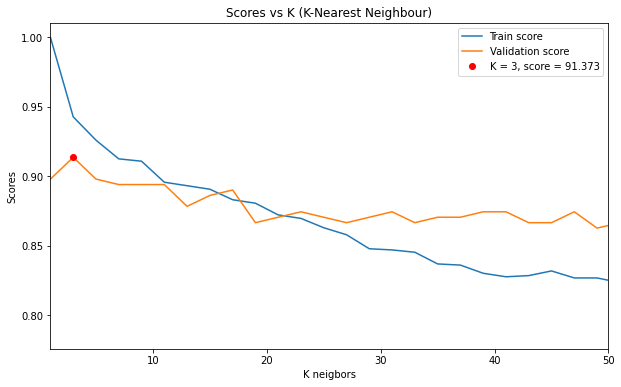

In [445]:
# Plotting the scores per K value
max_score_index = np.argmax(valid_scores)

plt.figure(figsize=(10, 6))
plt.plot(k_neighbors, train_scores, '-', label='Train score')
plt.plot(k_neighbors, valid_scores, '-', label='Validation score')

plt.plot(k_neighbors[max_score_index], valid_scores[max_score_index], 'ro', label='K = {}, score = {}'.format(k_neighbors[max_score_index], round(valid_scores[max_score_index]*100, 3)))

plt.xlim(1,50)
plt.xlabel('K neigbors')
plt.ylabel('Scores')
plt.title('Scores vs K (K-Nearest Neighbour)')
plt.legend()
plt.show()


Le modèle perd en performance sur le jeu d'apprentissage au fur et à mesure alors qu'il prédit de mieux en mieux sur le jeu de validation.

La courbe d'apprentissage passe en dessous de la courbe de validation à partir de k=10. Le modèle est en sur-apprentissage à partir de ce seuil.

Le meilleur découpage k-voisins est 3, car la courbe de validation atteint son maximum alors que la courbe d'apprentissage est toujours au dessus.

In [446]:
model = KNeighborsClassifier(n_neighbors=k_neighbors[max_score_index]).fit(data_train.iloc[:,1:], data_train.label)
model.score(data_test.iloc[:,1:], data_test.label)

0.8823529411764706

Le modèle prédit 88,62% des données de test. Ce score est meilleur que sur le modèle k-NN sans HOG.

### Soumission sur Kaggle

In [447]:
# Prédiction du modèle sur la dataset competition mise à l'échelle
pred = model.predict(competition)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('knn_with_hog_on_competition.csv', index=False)

## Random forest

Le Random Forest (forêt aléatoire) est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. Il est basé sur des ensembles  d'arbres de décision. 


### Création du modèle

In [448]:
# On initialise le modèle avec 10 arbres
rf = RandomForestClassifier(n_estimators=10, random_state=42) 
rf.fit(data_train.iloc[:,1:], data_train.label)

RandomForestClassifier(n_estimators=10, random_state=42)

In [449]:
rf.score(data_valid.iloc[:,1:], data_valid.label)

0.8117647058823529

La forêt aléatoire initialisée à 10 arbres fait un score de 83,529% sur la validation. Ce score est plus grand que celui avec les arbres de décision simples. 

### Amélioration du modèle

Une des méthodes pour améliorer notre modèle est d'augmenter le nombre d'arbre, nous allons tester des nombres aléatoires d'arbres dans notre forêt de décision.

In [450]:
n_trees = range(2,100)
valid_scores, train_scores = [], []
for n_tree in n_trees:
    rf = RandomForestClassifier(n_estimators=n_tree, random_state=42).fit(data_train.iloc[:,1:], data_train.label)
    train_scores.append(rf.score(data_train.iloc[:,1:], data_train.label))
    valid_scores.append(rf.score(data_valid.iloc[:,1:], data_valid.label))
    
max_score_index = np.argmax(valid_scores)
print(f'Meilleur score de validation: {round(max(valid_scores),3)} ; nombre d\'arbres: {n_trees[max_score_index]},')

Meilleur score de validation: 0.906 ; nombre d'arbres: 49,


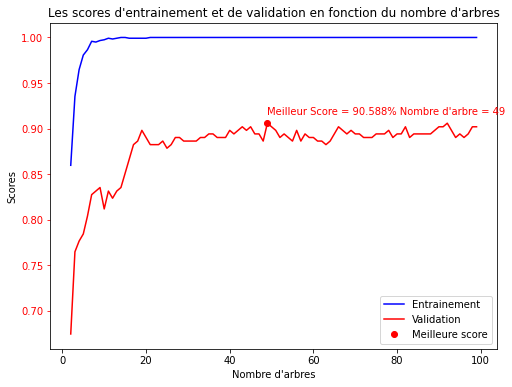

In [451]:
# Les scores d'entrainement et de validation en fonction du nombres d'arbres
plt.figure(figsize=(8, 6))
plt.plot(n_trees, train_scores, 'b-', label='Entrainement')
plt.plot(n_trees, valid_scores, 'r-', label='Validation')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Scores')
plt.tick_params('y', colors='r')


# Meilleur score de validation
plt.plot(n_trees[max_score_index], valid_scores[max_score_index], 'ro', label='Meilleure score')
plt.annotate(f'Meilleur Score = {round(max(valid_scores)*100, 3)}% Nombre d\'arbre = {round(n_trees[max_score_index], 5)}',
             xy=(n_trees[max_score_index], valid_scores[max_score_index]+0.01), color='red')

# Legende et titre
plt.legend(loc='best')
plt.title('Les scores d\'entrainement et de validation en fonction du nombre d\'arbres')

# Show the plot
plt.show()

A travers le graphique, on remarque que plus il y a d'arbres, plus le modèle est précis. 

Cependant, passé 66 arbres, la perfomance du modèle se détériore sur de nouvelles données. C'est le signe que notre modèle fait du sur-apprentissage après 66 arbres.

Nous allons nous limiter donc à 66 arbres pour faire les prédictions sur les données futures.

In [452]:
rf = RandomForestClassifier(n_estimators=n_trees[max_score_index], random_state=42).fit(data_train.iloc[:,1:], data_train.label)
rf.score(data_test.iloc[:,1:], data_test.label)

0.8862745098039215

On obtient un score de 89,80% sur les données de test. Notre modèle a une bonne capacité de généralisation par rapport aux modèles RandomForest précédents. 

### Soumission sur Kaggle

In [453]:
# Prédiction du modèle sur la dataset competition mise à l'échelle
pred = rf.predict(competition)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('random_forest_with_hog_on_competition.csv', index=False)

## Régression Logistique

### Création du modèle

In [454]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(data_train.iloc[:,1:], data_train.label)

LogisticRegression(max_iter=1000, random_state=42)

In [455]:
lr_model.score(data_valid.iloc[:,1:], data_valid.label)

0.8352941176470589

On obtient un score de 86,27% pour ce modèle. La performance peut être améliorée.

### Amélioration du modèle

#### Multinomial classes

Nous faisons prédictions sur des données qui peuvent être de plusieurs classes différentes (plus de deux classes différentes).

On peut utiliser un modèle de regression multinomial en précisant le paramètre **muli_class** de la fonction LogisticRegression à *multinomial*

In [456]:
mc_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
mc_model.fit(data_train.iloc[:,1:], data_train.label)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [457]:
mc_model.score(data_valid.iloc[:,1:], data_valid.label)

0.8352941176470589

L'utilisation de la regression multinomiale ne permet pas d'améliorer le modèle.

#### Polynomial Features

Ce modèle ne permet pas d'améliorer les performances.

Une autre technique est utilisée en régression logistique pour ajouter des ***variables polynomiales (polynomial features)*** au jeu de données avant d'entrainer le modèle.

L'ajout de ces caractéristiques polynomiales peut aider à modéliser des relations plus complexes entre les variables et la variable cible.

In [458]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(data_train.iloc[:,1:])
X_valid_poly = poly.transform(data_valid.iloc[:,1:])
X_test_poly = poly.transform(data_test.iloc[:,1:])
X_train_poly.shape

(1190, 321201)

La dimension du jeu de données a considérablement augmentée avec la transformation PolynomialFeatures.

Ce jeu de données sera très long à entrainer et peut conduire au sur-apprentissage. Il existe des méthodes pour réduire les dimensions : 
- La méthode Lasso (L1 normalizer) 
- La méthode Ridge (L2 normalizer) 
- PCA (Principal Composent Analysis) qui réduit la dimensionnalité tout en conservant les informations utiles

Pour ce cas précis, on gardera le modèle précedent pour faire nos futures prédictions.

In [459]:
mc_model.score(data_test.iloc[:,1:], data_test.label)

0.8431372549019608

On obtient un score de 81,56%, ce qui reste supérieur au modèle de regression logistique sans HOG.

### Soumission sur Kaggle

In [460]:
# Prédiction du modèle sur competition mise à l'échelle
pred = mc_model.predict(competition)
print(pred)
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = pred
df.to_csv('logistic_regression_with_hog_on_competition.csv', index=False)

[22 16 16 16 16 18  6 22 18  6  2  6 22  2  6  1 22 18 18 22  2  1 16 12
 12  1 16  6 22 16  6  2  6  1 18  2  1  2  1 18 16 22 22  6  2 16 12 22
  1 18  6  1 12 22 18 12 22  2 12 18  6 22  6 22  6 18  2 22 16 16 18  6
 12  6  6  6  2 22  1  1  2 22  1  6 22  6  1 12  6  2 22 16 22 22 12 22
  1 12  2 12 16 12 16  6 16 12 16  2 18  2  2  2  2  1 22  2  2  2 18  6
  1 22 22 16 12 16  1 22 22  2  6 16  6 16  2  2 18  2  1 16 12  6 22  2
 22 18  6 22  2 18 16  6  1 18 16  6 18 16  2 12  1  2 22 18 16 22 18 16
  1  1 18 12  2  6 16  6 22 12  2  1 16  2  1 18  2 12 12  2 18 16 18  1
  1 22  6  6 16  1 22  2  1 18 22  2  2  1  1  1 12  6 16  6  1  2 18 12
 18 18 12  2  1  1 18  1 22  2  1  1  2  6  6 16 22 18 18 16  2  1  6 22
 22  6  2  6 18 22 16 18 18 22 18 18 22  2 16 12 12  2 16 18  2  1  6 16
  6 16  6  2  2 22 18  2 22 22 18  6  6  6  2  2 12 18  2  6  2 12 12 12
  1 18 12 22 22 16  6 18  1  2 22 16 12  2 12  6  6  6 22  2  2  2 22  6
 18 18  6  2 12 16 22  6  1 12 12 16  2 18 18  2  6

## Neural networks

In [461]:
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

**Important** : les résultats des réseaux de neurones peuvent changer en fonction des perfomances de la machine. Les résultats obtenus à l'heure de la rédaction de ce notebook peuvent être différents à une prochaine exécution ou sur une autre machine.

### Création du modèle

In [462]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(data_train.iloc[:,1:].shape[1],)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

In [463]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [464]:
history = model.fit(data_train.iloc[:,1:], data_train.label, epochs=50, batch_size=32, validation_data=(data_valid.iloc[:,1:], data_valid.label))

Epoch 1/50
38/38 [==============================] - 3s 31ms/step - loss: 0.0000e+00 - accuracy: 0.1235 - val_loss: 0.0000e+00 - val_accuracy: 0.1765
Epoch 2/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - accuracy: 0.1319 - val_loss: 0.0000e+00 - val_accuracy: 0.1765
Epoch 3/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - accuracy: 0.1319 - val_loss: 0.0000e+00 - val_accuracy: 0.1765
Epoch 4/50
38/38 [==============================] - 1s 14ms/step - loss: 0.0000e+00 - accuracy: 0.1319 - val_loss: 0.0000e+00 - val_accuracy: 0.1765
Epoch 5/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.1319 - val_loss: 0.0000e+00 - val_accuracy: 0.1765
Epoch 6/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.1319 - val_loss: 0.0000e+00 - val_accuracy: 0.1765
Epoch 7/50
38/38 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.1319 - v

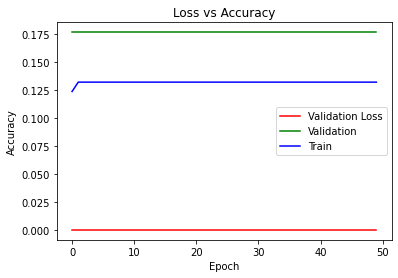

In [465]:
# Plot training & validation accuracy values
plt.plot(np.absolute(history.history['val_loss']), 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Ce modèle est très mauvais pour prédire les valeurs. Les valeurs sont figées, le modèle n'apprend pas.

Notre objectif est de minimiser le **loss** (la perte ou l'erreur de prédiction du modèle) tout en essayant d'augmenter l'**accuracy** (la précision de prédiction).

La loss est une mesure de la différence entre les prédictions du modèle et les vraies étiquettes.

On peut améliorer ce modèle par plusieurs techniques : 
- en utilisant un label binarizer
- en ajoutant plus de couches cachées
- en ajoutant des fonctions d'activation aux couches
- en ajoutant des régulateurs (Dropout) aux couches

### Amélioration du modèle

#### Label Binarization

Comme la cible est ici multi-classes nous devons adapter notre modèle à prédire des valeurs binaires en sortie.

Le Label binarizer permet de modifier la forme de la cible en un vecteur de la taille du nombre de classes différentes.

In [466]:
lb = LabelBinarizer()
train_labels_binarized = lb.fit_transform(data_train.label)
train_labels_binarized = pd.DataFrame(train_labels_binarized)

valid_labels_binarized = lb.transform(data_valid.label)
valid_labels_binarized = pd.DataFrame(valid_labels_binarized)

test_labels_binarized = lb.transform(data_test.label)
test_labels_binarized = pd.DataFrame(test_labels_binarized)


train_labels_binarized

,0,1,2,3,4,5,6
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1185,0,0,0,0,0,0,1
1186,0,0,0,1,0,0,0
1187,0,0,0,0,0,0,1
1188,0,0,1,0,0,0,0


On obtient un vecteur de taille 7 avec des zéros partout sauf à la position correspondant à la valeur de la classe où il devrait y avoir un 1. Mais les valeurs de la cible devraient commencer à 0 (ici elles commencent à 1).

In [467]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(data_train.iloc[:,1:].shape[1],)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(7)
])

In [468]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [469]:
history = model.fit(data_train.iloc[:,1:], train_labels_binarized, epochs=50, batch_size=32, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50
38/38 [==============================] - 2s 23ms/step - loss: 0.4056 - accuracy: 0.3286 - val_loss: 0.3047 - val_accuracy: 0.5529
Epoch 2/50
38/38 [==============================] - 0s 11ms/step - loss: 0.2737 - accuracy: 0.6193 - val_loss: 0.2378 - val_accuracy: 0.6471
Epoch 3/50
38/38 [==============================] - 0s 13ms/step - loss: 0.2205 - accuracy: 0.7479 - val_loss: 0.1943 - val_accuracy: 0.8157
Epoch 4/50
38/38 [==============================] - 0s 11ms/step - loss: 0.1857 - accuracy: 0.7832 - val_loss: 0.1751 - val_accuracy: 0.7725
Epoch 5/50
38/38 [==============================] - 0s 8ms/step - loss: 0.1636 - accuracy: 0.8101 - val_loss: 0.1630 - val_accuracy: 0.7725
Epoch 6/50
38/38 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.8420 - val_loss: 0.1568 - val_accuracy: 0.8157
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.1375 - accuracy: 0.8487 - val_loss: 0.1479 - val_accuracy: 0.8549
Epoch 8/50
38/38

In [470]:
max_score_index = np.argmax(history.history['val_accuracy'])

print(f'{history.history["val_loss"][max_score_index]} --> {history.history["val_accuracy"][max_score_index]}')

0.16894882917404175 --> 0.8823529481887817


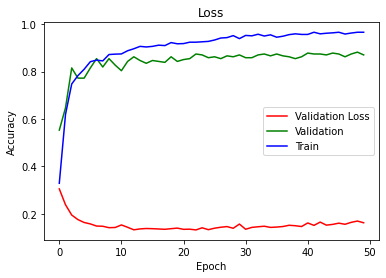

In [471]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Le modèle obtenu après binarisation des classes est beaucoup plus performant que le modèle de départ.

Il présente une bonne capacité d'apprentissage et de prédiction. Il minimise également l'erreur au fur et à mesure du processus d'apprentissage.

Ce modèle est un modèle satisfaisant. On obtient 0.1169217899441719 (loss) --> 0.886274516582489 (score) sur le jeu de validation.

Néanmoins, nous allons tester d'autres techniques et voir si le modèle s'améliore.

NB: les résultats des réseaux de neurones peuvent changer en fonction des perfomances de la machine. Les résultats obtenus à l'heure de la rédaction de ce notebook peuvent être différents à une prochaine exécution ou sur une autre machine.

#### Ajouter plus de couches

On peut augmenter le nombre de couches cachées du modèle précédent et voir si le modèle fait mieux.

In [472]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(data_train.iloc[:,1:].shape[1],)),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(7)
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [473]:
history = model.fit(data_train.iloc[:,1:], train_labels_binarized, epochs=50, batch_size=32, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50
38/38 [==============================] - 2s 23ms/step - loss: 0.3187 - accuracy: 0.5370 - val_loss: 0.2130 - val_accuracy: 0.6706
Epoch 2/50
38/38 [==============================] - 0s 12ms/step - loss: 0.1878 - accuracy: 0.7689 - val_loss: 0.1676 - val_accuracy: 0.7843
Epoch 3/50
38/38 [==============================] - 1s 15ms/step - loss: 0.1564 - accuracy: 0.8050 - val_loss: 0.1524 - val_accuracy: 0.7961
Epoch 4/50
38/38 [==============================] - 1s 15ms/step - loss: 0.1387 - accuracy: 0.8420 - val_loss: 0.1609 - val_accuracy: 0.8039
Epoch 5/50
38/38 [==============================] - 1s 18ms/step - loss: 0.1379 - accuracy: 0.8420 - val_loss: 0.1559 - val_accuracy: 0.8549
Epoch 6/50
38/38 [==============================] - 1s 15ms/step - loss: 0.1272 - accuracy: 0.8529 - val_loss: 0.1523 - val_accuracy: 0.8157
Epoch 7/50
38/38 [==============================] - 1s 22ms/step - loss: 0.1161 - accuracy: 0.8723 - val_loss: 0.1533 - val_accuracy: 0.8627
Epoch 8/50
38

In [474]:
max_score_index = np.argmax(history.history['val_accuracy'])
print(f'{history.history["val_loss"][max_score_index]} --> {history.history["val_accuracy"][max_score_index]}')

0.14901424944400787 --> 0.8941176533699036


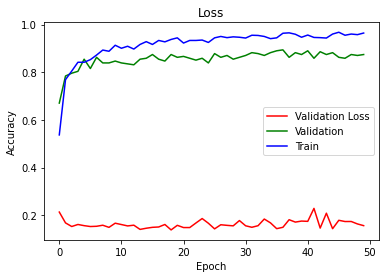

In [475]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Une certaine amélioration par rapport au modèle précédent. Les scores d'apprentissage et de validation restent assez proches et augmentent ensemble.

Loss validation : 0.1526583731174469 --> Score validation: 0.8901960849761963

Il peut être intéressant d'ajouter des fonctions d'activation aux noeuds de notre modèle afin d'introduire de la non-linéarité dans les prédictions. Cela pourrait améliorer le modèle.

#### Ajouter des fonctions d'activation aux couches

Les fonctions d'activation vont permettre d'ajouter de la non-linéarité aux données. L'idée est d'essayer plusieurs fonctions d'activation et de garder celles qui donnent la meilleure performance.

On utilise très souvent les fonctions suivantes :

- **Sigmoid** : cette fonction d'activation fait correspondre tout nombre réel à l'intervalle [0, 1]. Elle est couramment utilisée comme fonction d'activation pour les problèmes de classification binaire.

- **ReLU (Rectified Linear Unit)** : Cette fonction d'activation est une fonction linéaire par morceaux qui renvoie l'entrée si elle est positive et 0 sinon. Elle est largement utilisée dans les modèles d'apprentissage profond car elle est efficace sur le plan computationnel et contribue à prévenir le problème de disparition du gradient.

- **Leaky ReLU** : Il s'agit d'une variation de la fonction ReLU qui permet un petit gradient non nul lorsque l'entrée est négative, ce qui peut aider à éviter les neurones morts.

- **Tanh (tangente hyperbolique)** : Cette fonction d'activation renvoie une valeur entre -1 et 1, ce qui peut être utile pour certains types de données. C'est également une version lissée de la fonction escalier, ce qui la rend plus facile à optimiser à l'aide de méthodes basées sur les gradients.

- **Softmax** : Il s'agit d'une généralisation de la fonction sigmoïde qui peut être utilisée pour des problèmes de classification multiclasse. Elle cartographie la sortie de la dernière couche sur une distribution de probabilité sur les différentes classes.

In [476]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(data_train.iloc[:,1:].shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [477]:
history = model.fit(data_train.iloc[:,1:], train_labels_binarized, epochs=50, batch_size=100, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


11/12 [==========================>...] - ETA: 0s - loss: 0.5131 - accuracy: 0.1736

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 5s 71ms/step - loss: 0.5053 - accuracy: 0.1672 - val_loss: 0.4087 - val_accuracy: 0.1255
Epoch 2/50
12/12 [==============================] - 0s 38ms/step - loss: 0.3956 - accuracy: 0.2076 - val_loss: 0.3781 - val_accuracy: 0.3569
Epoch 3/50
12/12 [==============================] - 0s 41ms/step - loss: 0.3609 - accuracy: 0.4143 - val_loss: 0.3306 - val_accuracy: 0.5451
Epoch 4/50
12/12 [==============================] - 0s 26ms/step - loss: 0.3224 - accuracy: 0.5454 - val_loss: 0.3011 - val_accuracy: 0.6275
Epoch 5/50
12/12 [==============================] - 0s 22ms/step - loss: 0.2919 - accuracy: 0.6454 - val_loss: 0.2754 - val_accuracy: 0.6588
Epoch 6/50
12/12 [==============================] - 0s 24ms/step - loss: 0.2652 - accuracy: 0.6899 - val_loss: 0.2507 - val_accuracy: 0.6980
Epoch 7/50
12/12 [==============================] - 0s 26ms/step - loss: 0.2419 - accuracy: 0.7429 - val_loss: 0.2354 - val_accuracy: 0.7020
Epoch 8/50
12/12 [======

In [478]:
max_score_index = np.argmax(history.history['val_accuracy'])
print(f'{history.history["val_loss"][max_score_index]} --> {history.history["val_accuracy"][max_score_index]}')

0.09133567661046982 --> 0.9098039269447327


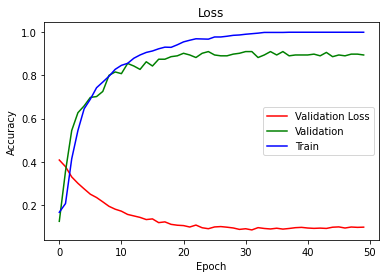

In [479]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Le modèle est meilleur par rapport au modèle précédent. 

La perte se minimise au fur et à mesure des epochs tandis que le score augmente.

De plus, on atteint un score de validation plus élévé que précédement : 8,6% de perte --> 91,37% de bonne prédiction

Une dernière tentative d'amélioration du modèle serait d'ajouter des regulateurs aux couches pour éviter le sur-apprentissage.

#### Regularisation des couches par Dropout

Le dropout est une technique de régularisation qui consiste à désactiver aléatoirement un certain nombre de neurones d'une couche lors de l'entraînement du modèle, afin d'éviter la suradaptation (overfitting) et d'améliorer la généralisation du modèle.

In [480]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(data_train.iloc[:,1:].shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [481]:
history = model.fit(data_train.iloc[:,1:], train_labels_binarized, epochs=50, batch_size=100, validation_data=(data_valid.iloc[:,1:], valid_labels_binarized))

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 3s 47ms/step - loss: 0.5866 - accuracy: 0.1353 - val_loss: 0.4304 - val_accuracy: 0.1686
Epoch 2/50
 1/12 [=>............................] - ETA: 0s - loss: 0.4932 - accuracy: 0.1300

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


12/12 [==============================] - 0s 29ms/step - loss: 0.4637 - accuracy: 0.1487 - val_loss: 0.4077 - val_accuracy: 0.2667
Epoch 3/50
12/12 [==============================] - 0s 24ms/step - loss: 0.4365 - accuracy: 0.1387 - val_loss: 0.4111 - val_accuracy: 0.2902
Epoch 4/50
12/12 [==============================] - 0s 26ms/step - loss: 0.4262 - accuracy: 0.1672 - val_loss: 0.3985 - val_accuracy: 0.3412
Epoch 5/50
12/12 [==============================] - 0s 33ms/step - loss: 0.4155 - accuracy: 0.2034 - val_loss: 0.3617 - val_accuracy: 0.5098
Epoch 6/50
12/12 [==============================] - 0s 23ms/step - loss: 0.3844 - accuracy: 0.3395 - val_loss: 0.3297 - val_accuracy: 0.5294
Epoch 7/50
12/12 [==============================] - 0s 25ms/step - loss: 0.3659 - accuracy: 0.3580 - val_loss: 0.3001 - val_accuracy: 0.5608
Epoch 8/50
12/12 [==============================] - 0s 26ms/step - loss: 0.3445 - accuracy: 0.4252 - val_loss: 0.2758 - val_accuracy: 0.6549
Epoch 9/50
12/12 [======

In [482]:
max_score_index = np.argmax(history.history['val_accuracy'])
print(f'{history.history["val_loss"][max_score_index]} --> {history.history["val_accuracy"][max_score_index]}')

0.09811223298311234 --> 0.886274516582489


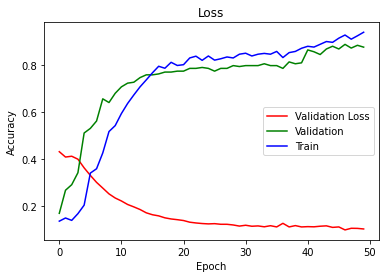

In [483]:
# Plot training & validation accuracy values
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'green')
plt.plot(history.history['accuracy'], 'b')
plt.title('Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation Loss', 'Validation', 'Train'], loc='best')
plt.show()

Les regulateurs sont censés éviter le sur-apprentissage. La perte continue à descendre alors que les scores de validation et d'entrainement augmentent ensemble. Le score n'est pas différent du précédent.

La courbe d'apprentissage se confond presque à la courbe de validation, ceci présage une bonne capacité de généralisation.

On utilisera ce modèle pour prédire les données futures.

 ### Application sur données de tests

In [484]:
score = model.evaluate(data_test.iloc[:,1:], test_labels_binarized)
score

8/8 [==============================] - 0s 5ms/step - loss: 0.0882 - accuracy: 0.8941


[0.08824267238378525, 0.8941176533699036]

On obtient 88,23% de précision sur le jeu de test. Ceci est satisfaisant, mais reste faible par rapport à d'autres modèles comme le modèle SVM avec noyau RBF.

### Soumission sur Kaggle

In [485]:
# Prédiction du modèle sur competition mise à l'échelle
NN_pred = model.predict(competition)
NN_pred
# we put this predictions in a DataFrame with the right format expected by kaggle
df = pd.DataFrame(np.arange(1,501), columns=['Id'])
df['label'] = [np.argmax(pred, axis=0) for pred in NN_pred]
df.label

16/16 [==============================] - 0s 5ms/step


0      6
1      4
2      5
3      4
4      4
      ..
495    6
496    4
497    2
498    6
499    3
Name: label, Length: 500, dtype: int64

In [486]:
df.to_csv('neural_network_with_hog_on_competition.csv', index=False)

## Conclusion

Parmi tous les modèles vus jusqu'actuellement, c'est le modèle svm_rbf qui réalise le plus grand score sur les données de compétition.

Le modèle Neural Network réalise une bonne performance sur les données de validation et de test, mais réalise un score très faible sur les données de compétition. Est-ce dû à un problème de mise à échelle ou de sur-ajustement ?